In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [3]:
data = pd.read_excel('dataset.xlsx')

In [4]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# 1.Exploratory Data Analysis
## Checklist de base
### Analyse de la forme:
-**Variable target**:SARS-Cov-2 exam result

-**Lignes et colonnes**:5644, 111

-**Types de variable**: qualitatives: 70, quantitatives: 41

-**Analyse des valeurs manquantes**:

    -Beaucoup de NaN(moitié de variables>90% de NaN)
    
    -2 groupes de données 76% ->Test viral, 89% taux sanguins

### Analyse du fond
-**Visualisaiton de la target**:

    -10% de positifs
    
-**Signification des variables**:

    -Variables continues standardisées, skewed(asymétriques), test sanguin
    
    -age quantile: difficile d'interpréter ce graphique. Clairement ces données ont été traitées, on pourrait penser 0-5, mais cela pourrait aussi être une transformation mathématique. On ne peut pas savoir car la personne qui a mis ce dataset ne le précise nulle part.Mias ce n'est pas important.
    -variable qualitative: binaire (0,1), viral, Rhinovirus qui semble très élevé
    
-**Relation "Variables**:

    -target / blood : les taux de Monocytes, Platelets, Leucocytes semblent liés au covide-19 -> hypothèse à tester.
    
    -target / age : les individus de faible âge sont très peu contaminés ? -> Attention on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche, cette variable pourra être intéressante pour la comparer avec les résultats de tests sanguins.
    
    -target / viral : les doubles maladies sont très rares. Rhinovirus / Enterovirus positif - covid - 19 négatif? -> Hypothèse à tester? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut très bien avoir 2 virus en même temps. Tout ça n'a aucun lien avec le covid-19.


## Analyse plus détaillée
### Relation Variables / Variables:
    blood_data / blood_data: certaines variables sont très corrélées: +0.9 de coefficient de corrélation (à surveiller plus tard)
    
    blood_data / age: très faible correlation entre age et taux sanguins
    
    viral / viral: Influenza rapid test donne de mauvais résultats, il faudra peut-être la laisser tomber
    
    relation maladie / blood data: Les taux sanguins entre malades et covid-19 sont différents
    
    relation hospitalisation / est malade:
    
    relation hospitalisation / blood: intéressant dans le cas où on voudrait prédire dans quel service un patient devrait aller.

-**NaN analyse:** viral: 1350(92/8), blood : 600(87/13), both: 90

## Hypothèses nulles (H0):
    Les individus atteints du covid-19 ont des taux de Leucocytes, Monocytes, Platelets significativement différents.
        H0 = Les taux moyens sont égaux chez les individus positifs et négatifs.
    
    Les individus atteints d'une quelconque maladie ont des taux significativement différents.

### Conclusions initiales
    Beaucoup de données manquantes (au mieux on garde 20% du dataset)
    
    Deux groupes de données intéressantes (viral, sanguin)
    
    Presque pas de variables "discriminantes" pour distinguer les cas positifs/négatifs,ce qui nous permet de dire qu'il n'est pas vraiment approprié de vouloir prédire si un individu est atteint du Covid-19 en se basant sur ces simples tests sanguins. 

# Analyse de la forme

In [5]:
df = data.copy()

In [6]:
df.shape

(5644, 111)

In [7]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:>

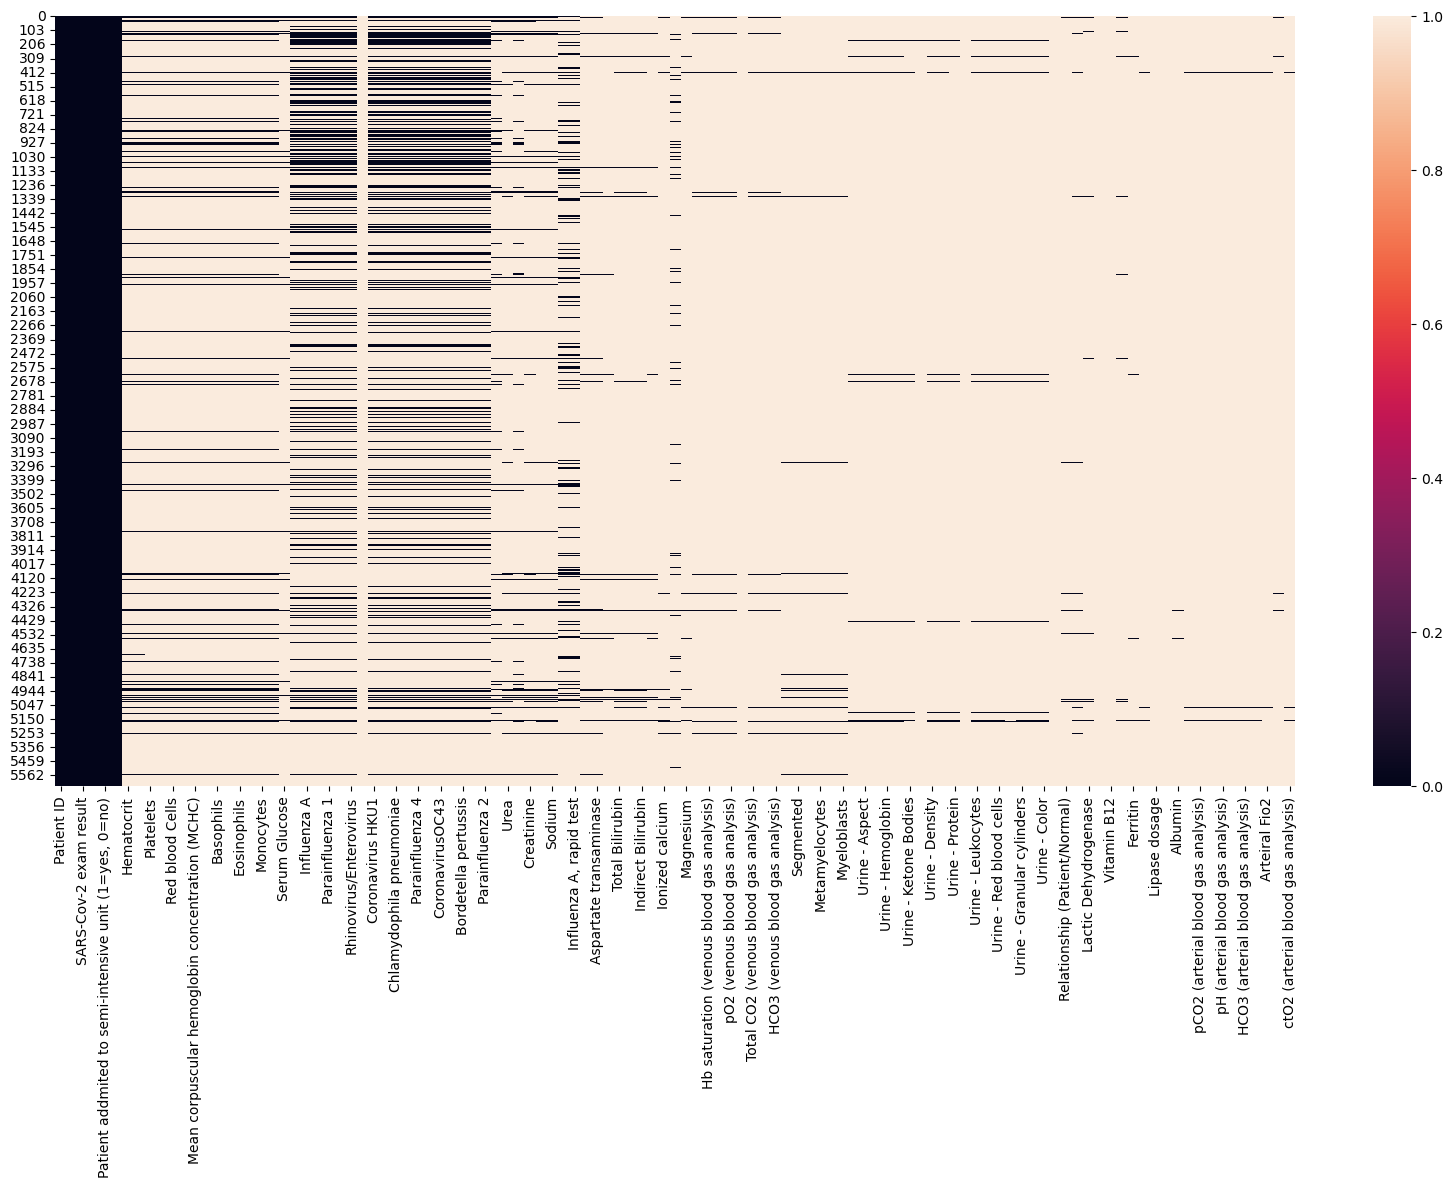

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Analyse du fond

## 1. Visualisation initiale: élimination des colonnes inutiles

In [10]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

<AxesSubplot:>

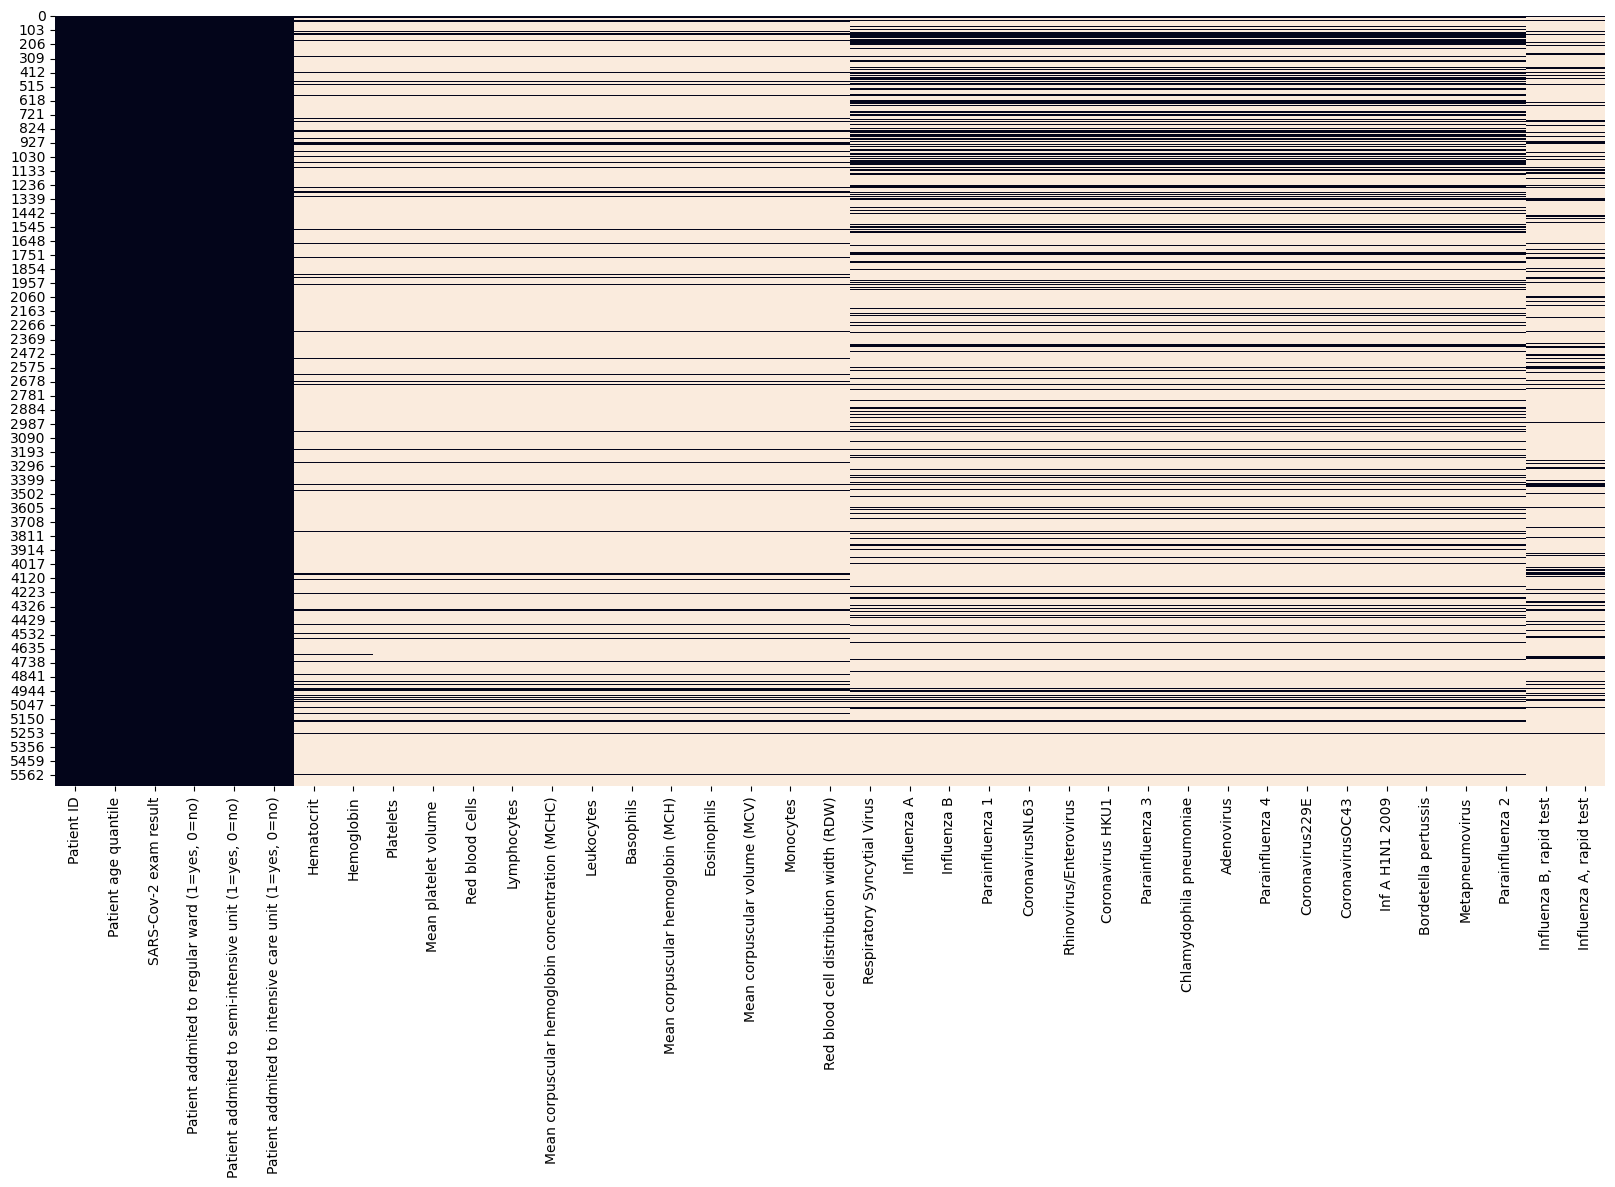

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar = False)

In [12]:
df = df.drop('Patient ID', axis = 1)

In [13]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [14]:
df['SARS-Cov-2 exam result'].value_counts(normalize = True) #Normalize pour afficher en pourcentage

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

## 2. Histogrammes des variables continues

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

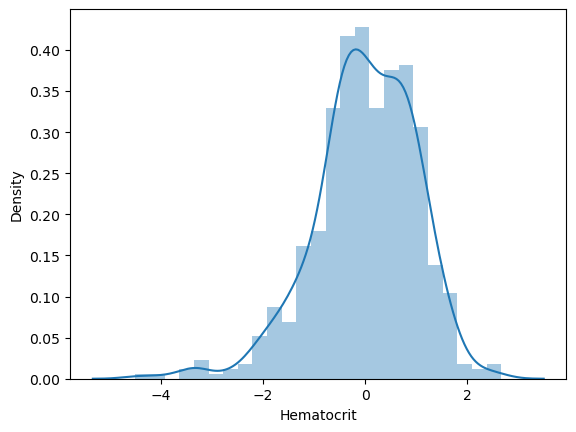

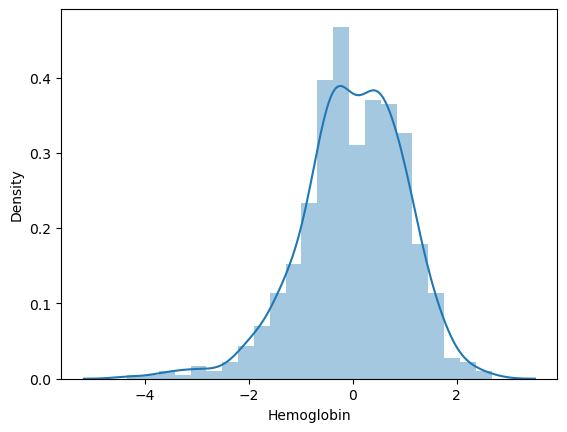

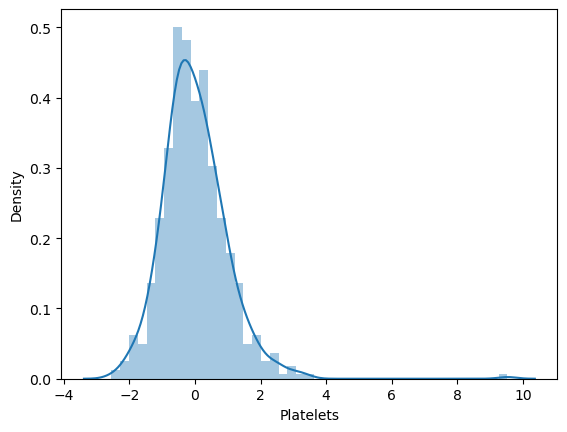

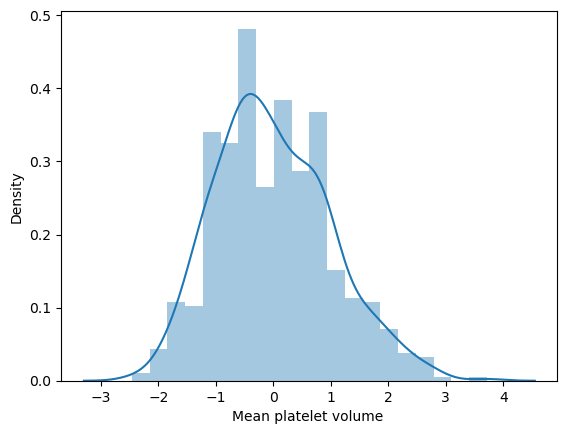

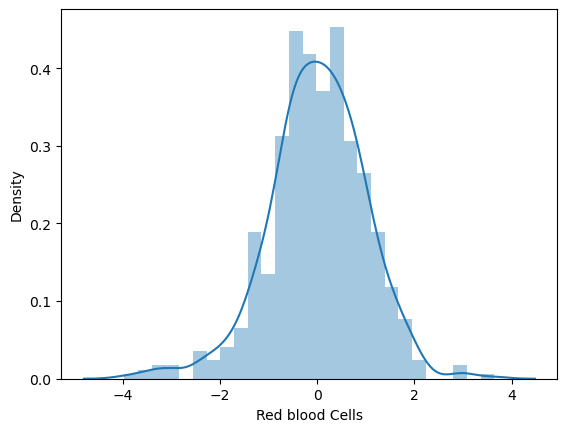

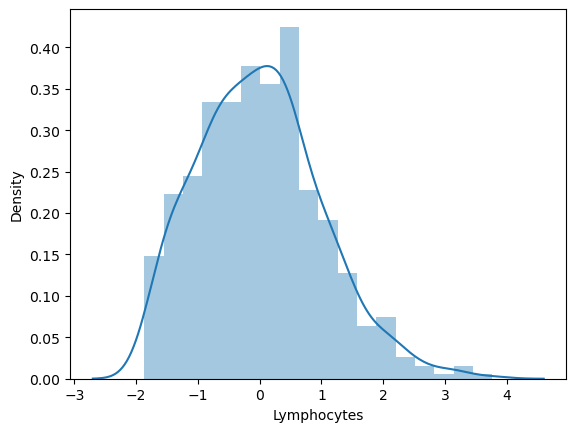

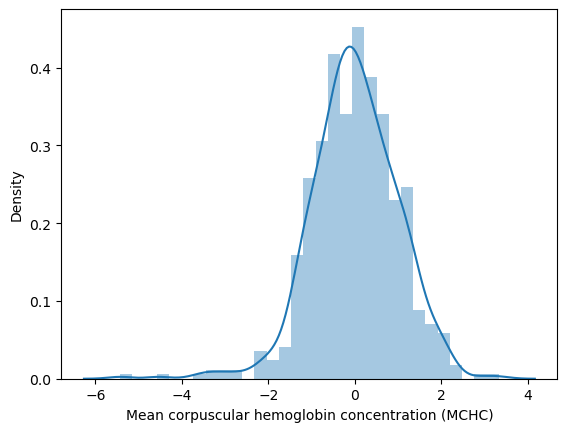

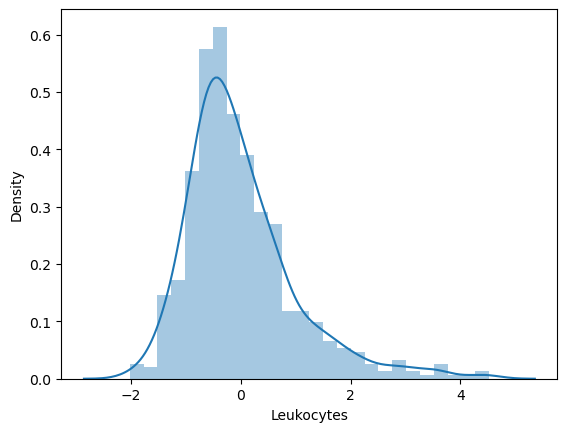

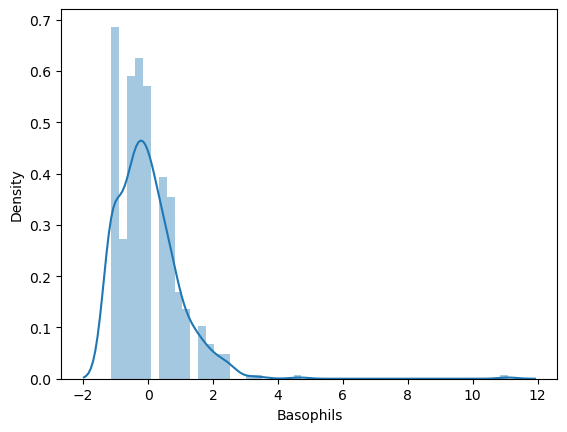

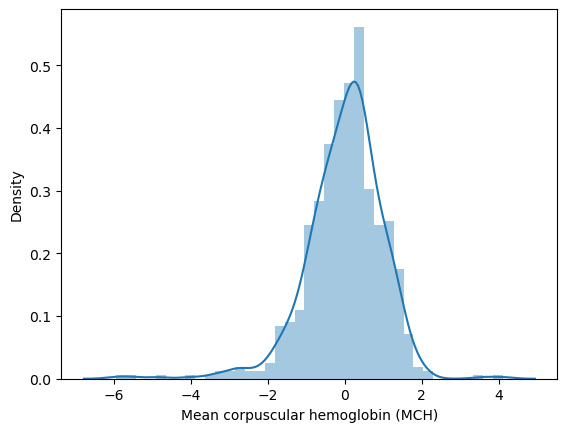

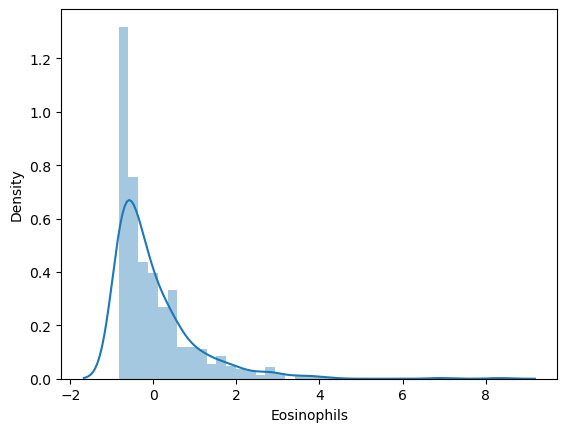

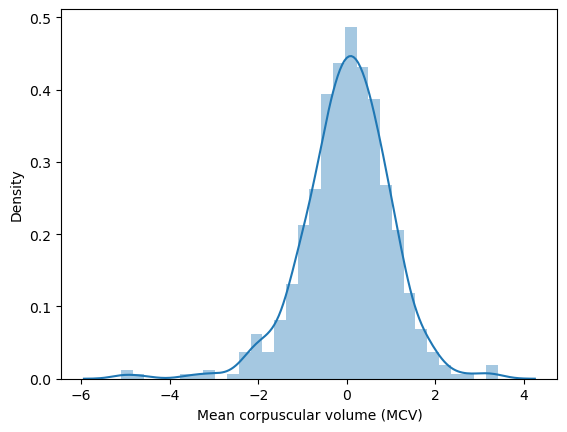

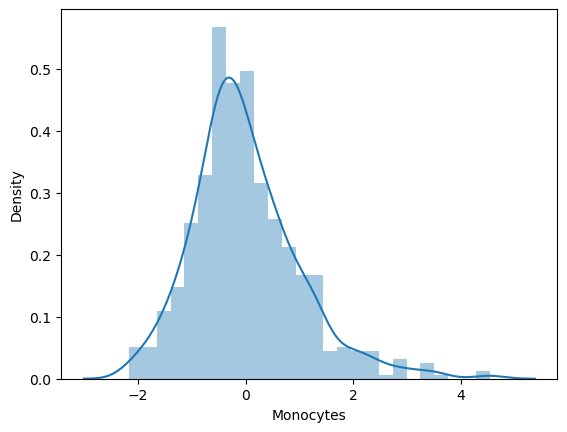

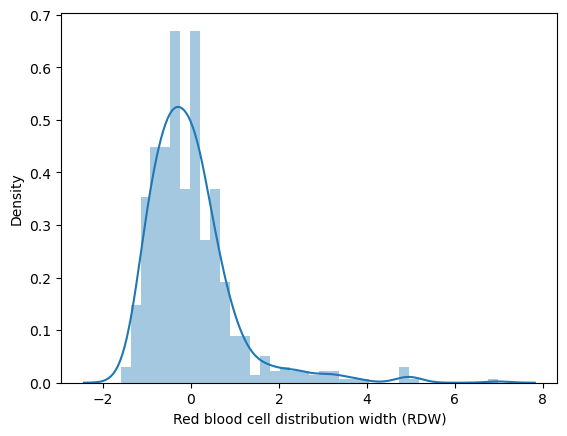

In [15]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

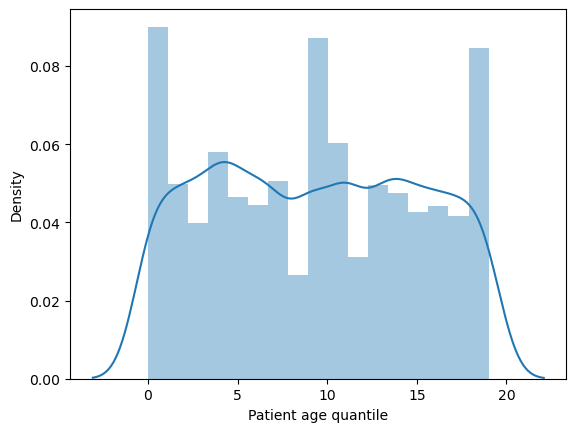

In [16]:
sns.distplot(df['Patient age quantile'])

In [17]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

### Variables Qualitatives

In [18]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

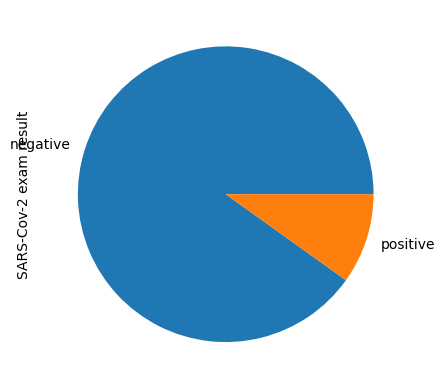

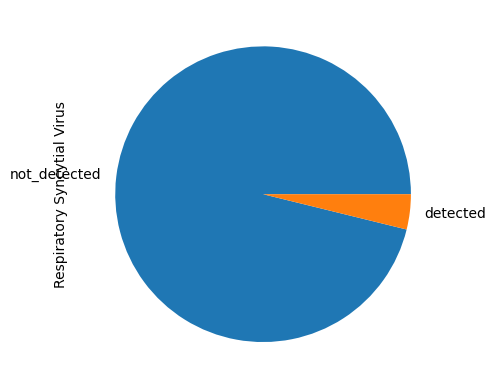

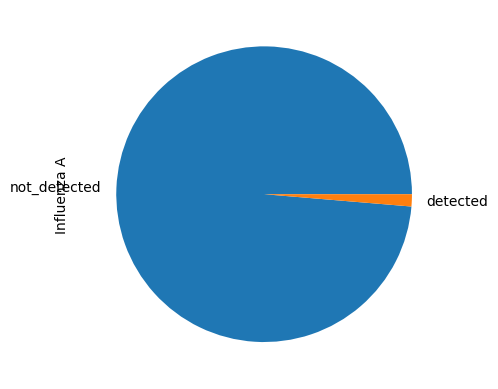

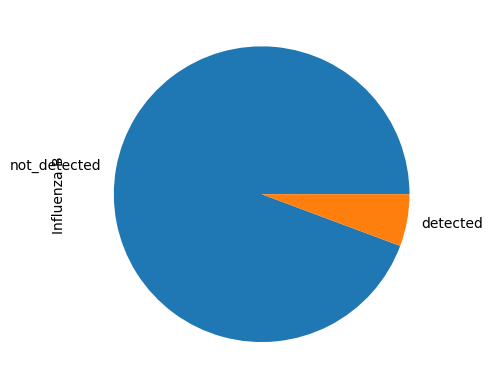

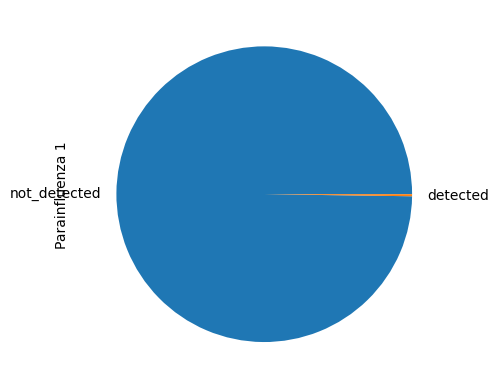

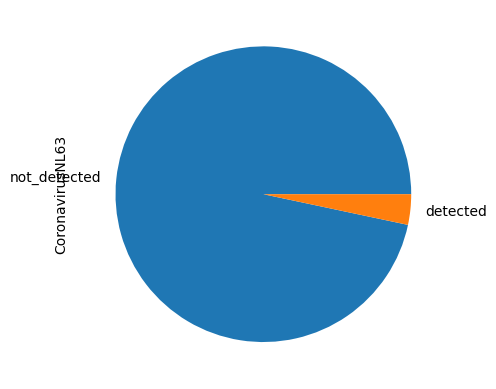

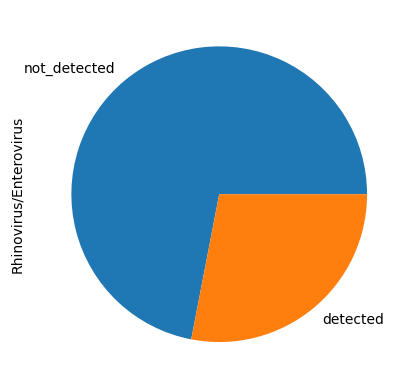

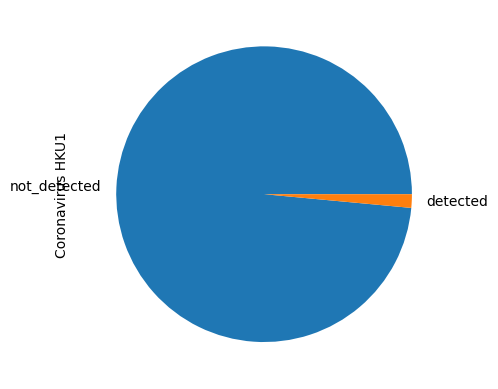

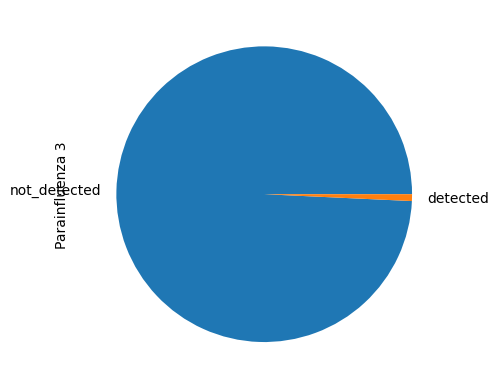

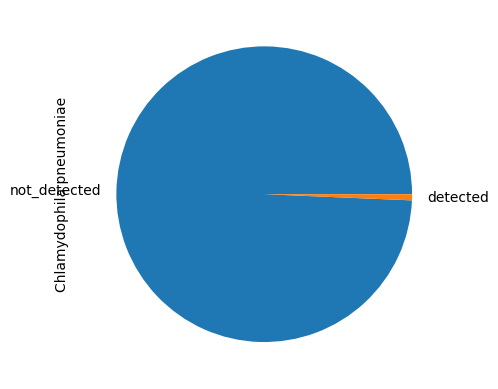

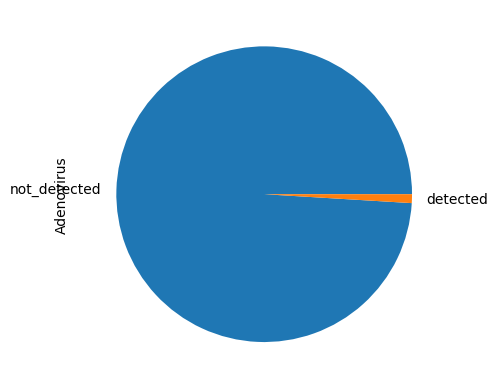

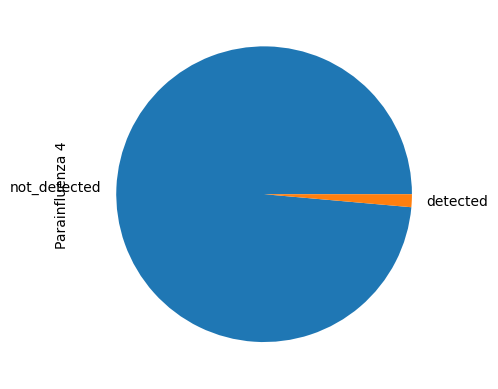

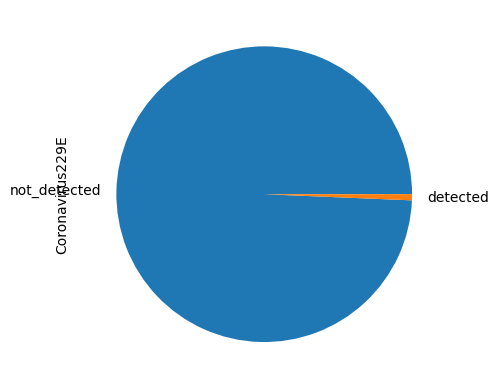

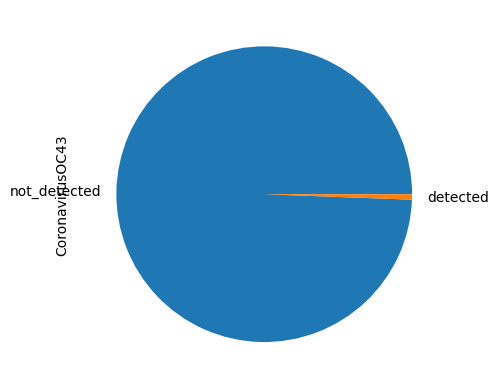

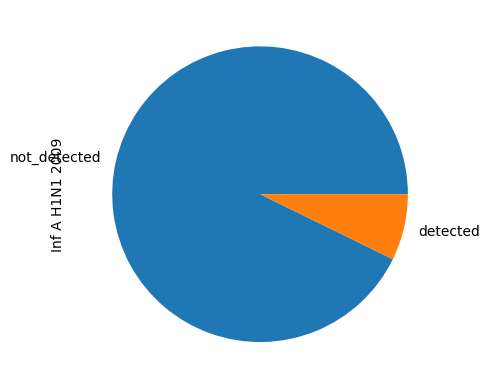

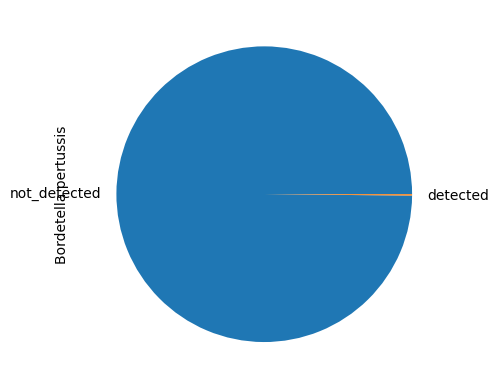

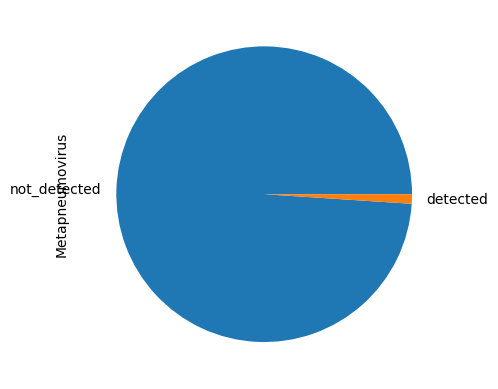

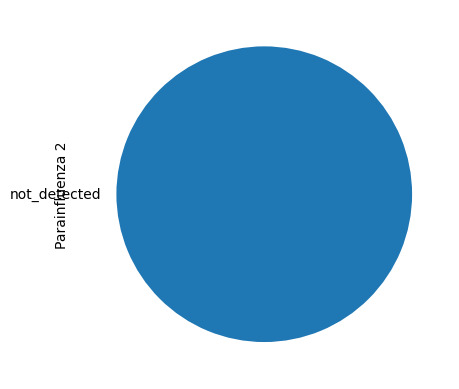

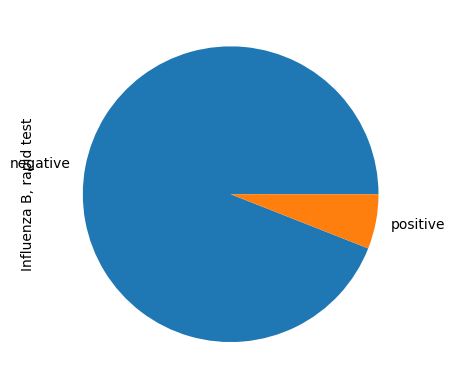

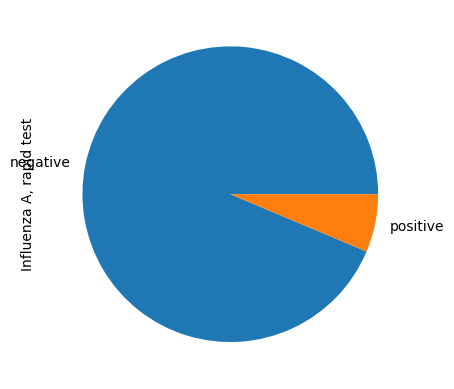

In [19]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## 3. Relation Target / Variables

### Création de sous-ensembles positifs et négatifs

In [20]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [21]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Création des ensembles Blood et viral

In [22]:
missing_rate = df.isna().sum()/df.shape[0]

In [23]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [24]:
viral_columns = df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)]

### Target / Blood

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

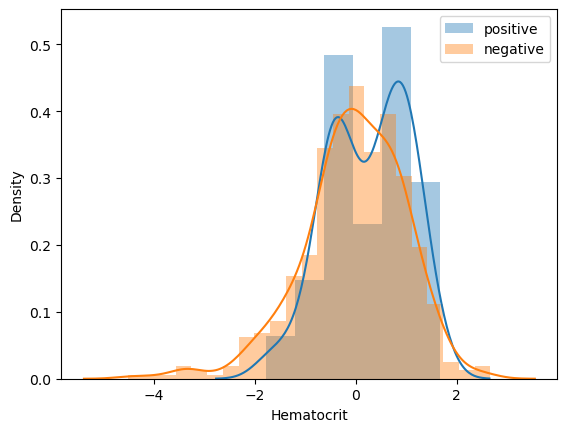

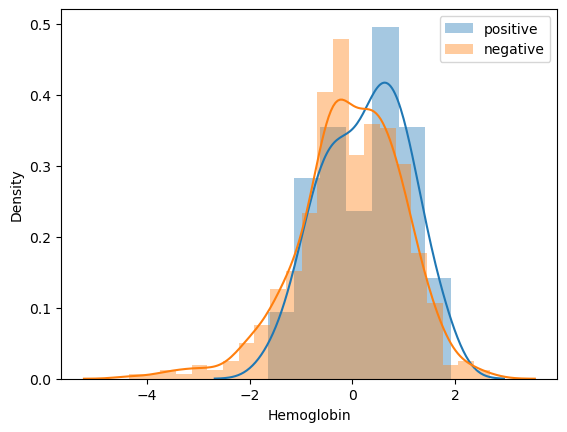

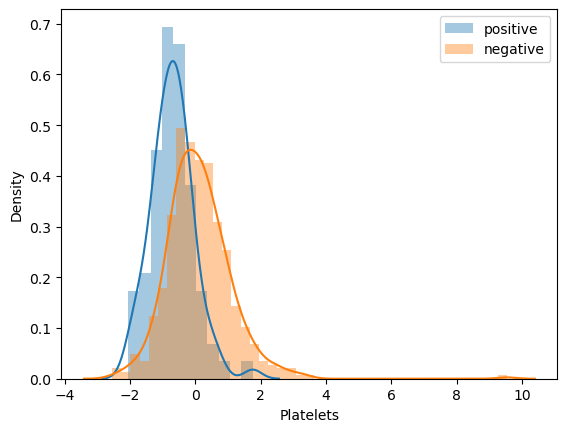

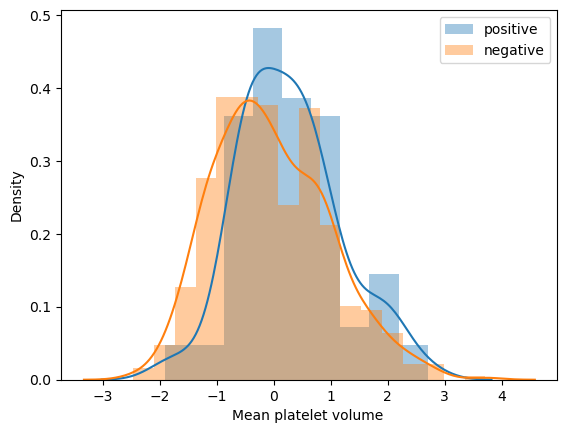

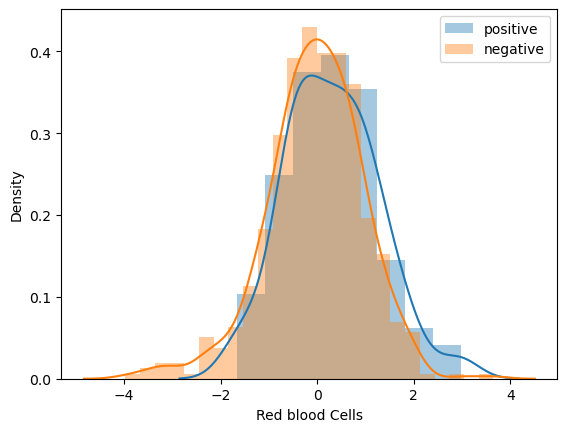

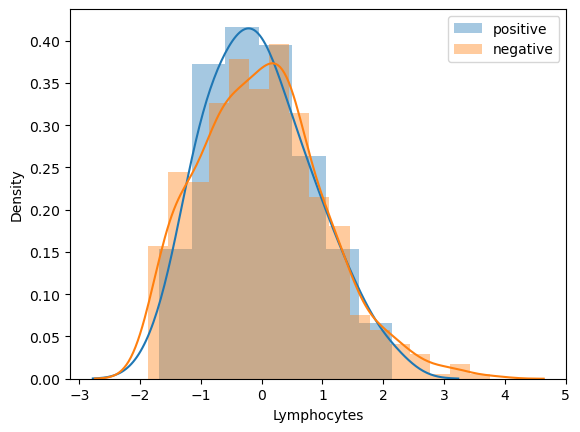

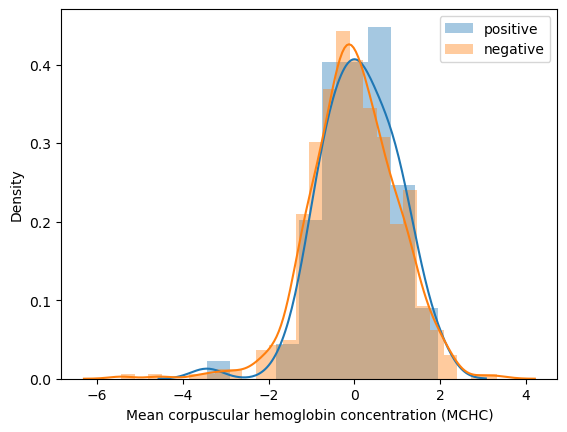

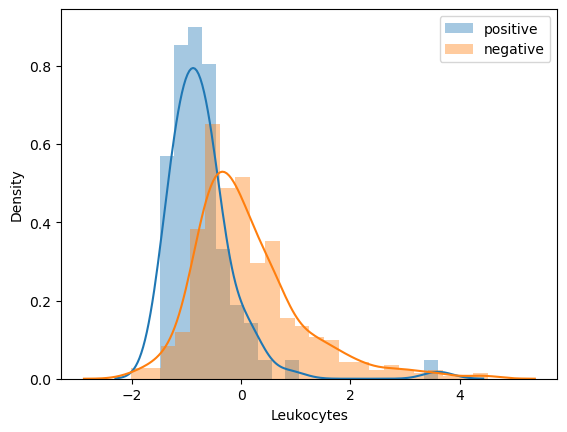

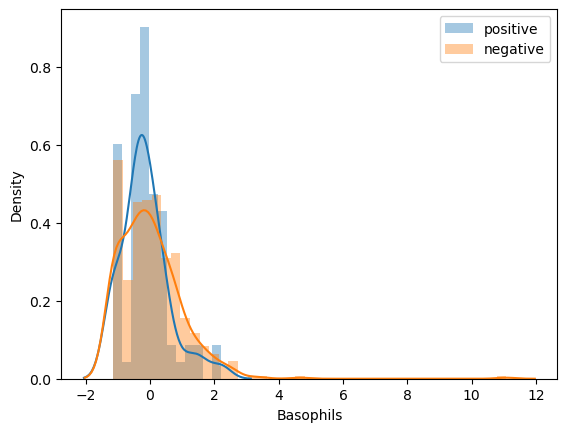

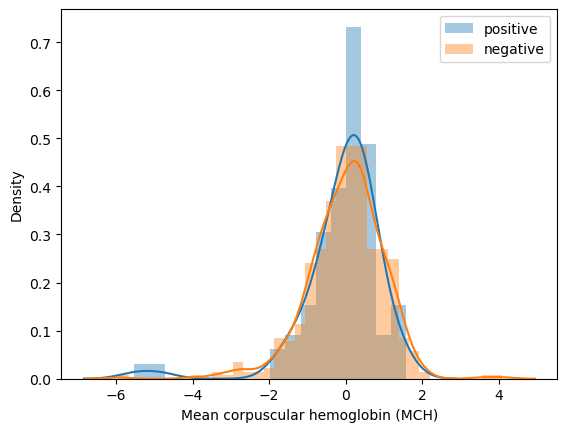

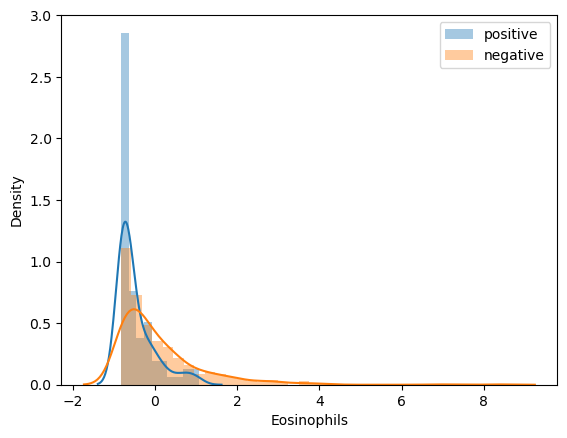

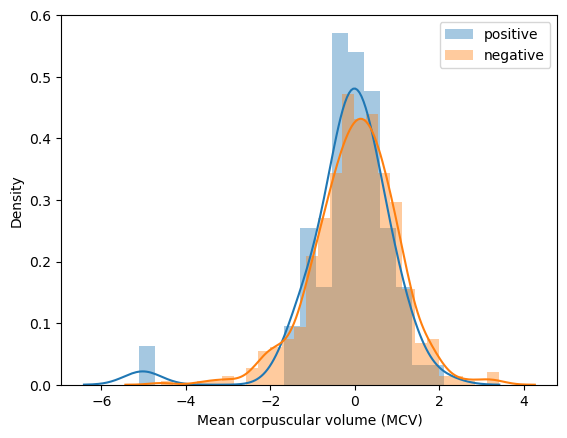

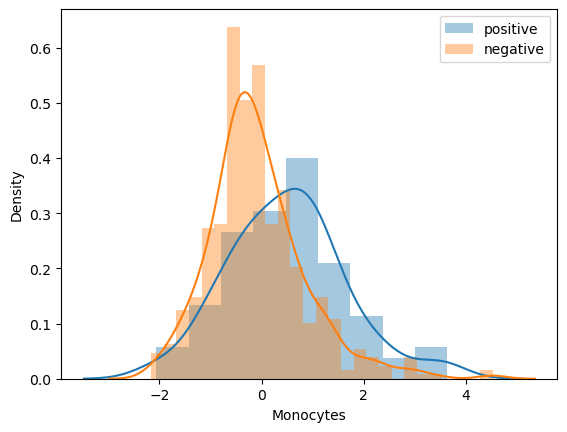

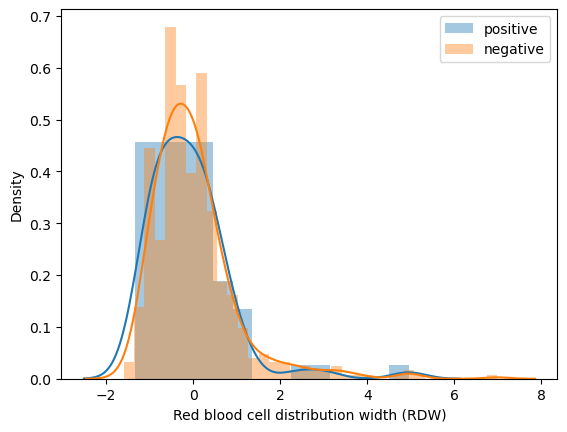

In [25]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label = 'positive')
    sns.distplot(negative_df[col], label = 'negative')
    plt.legend()

### Relation Target / Age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

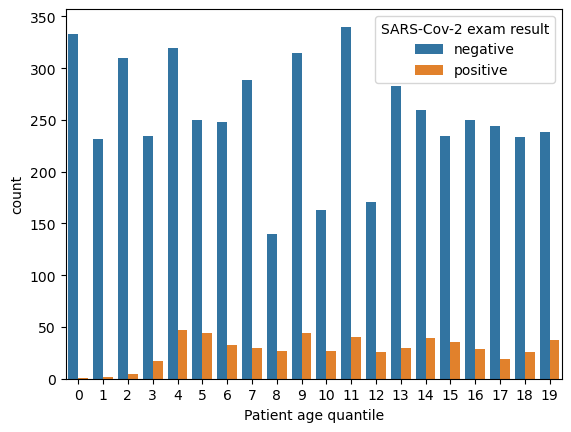

In [26]:
sns.countplot(x = 'Patient age quantile', hue ='SARS-Cov-2 exam result', data = df )

### Relation Target / Viral

In [27]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

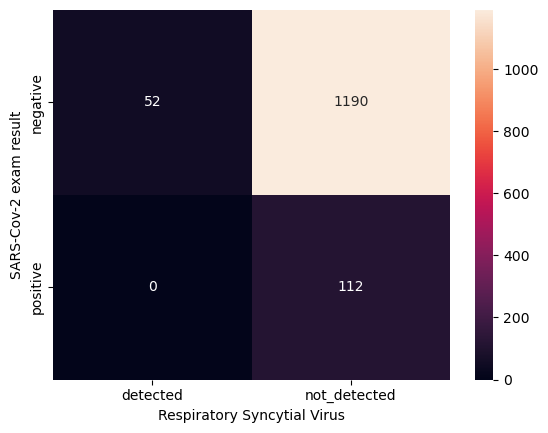

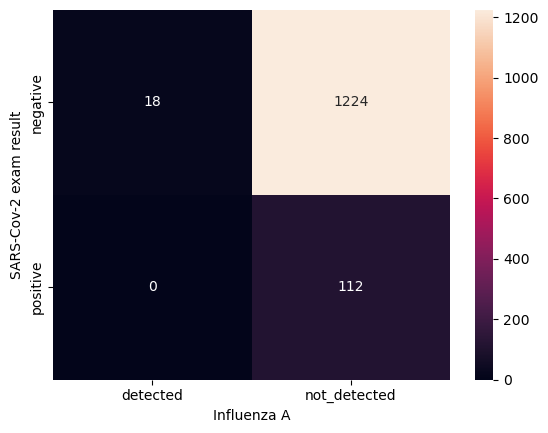

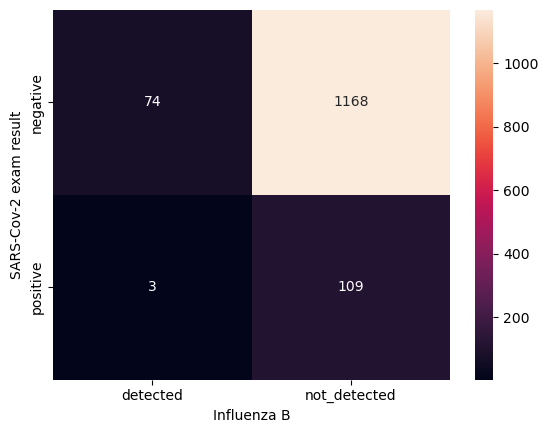

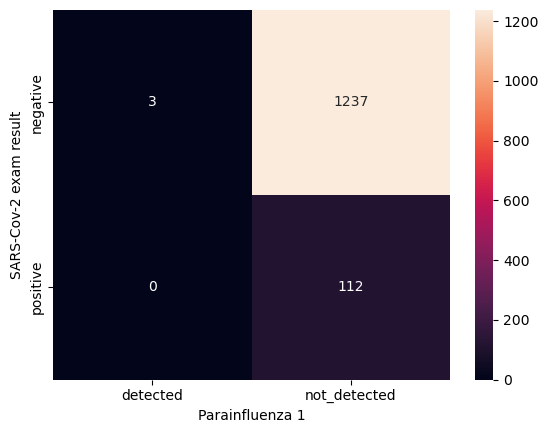

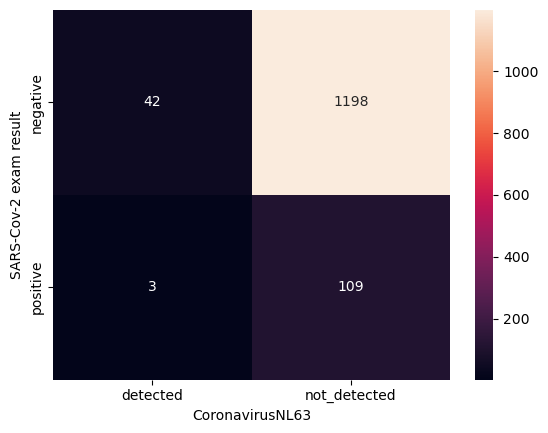

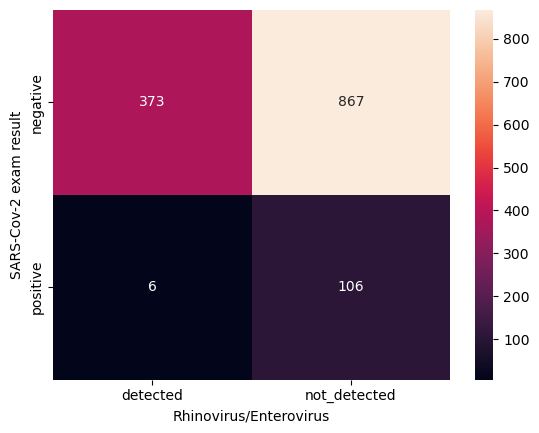

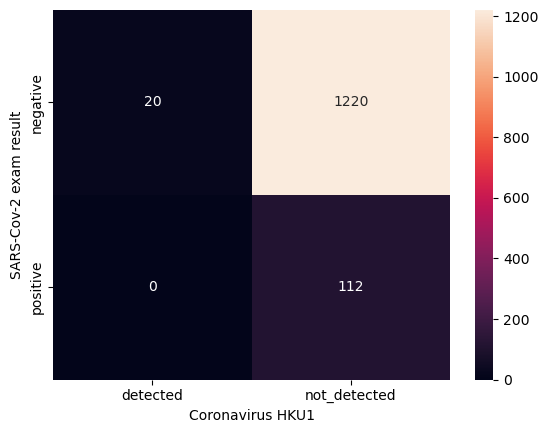

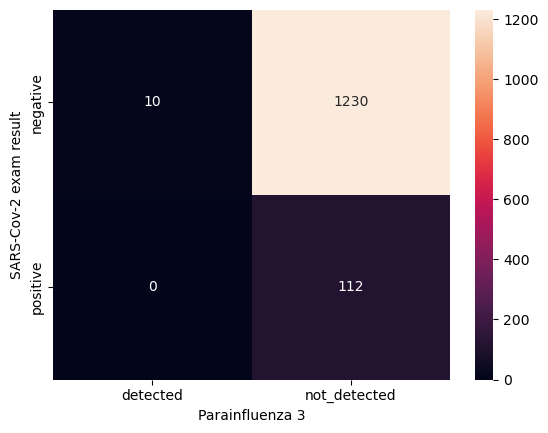

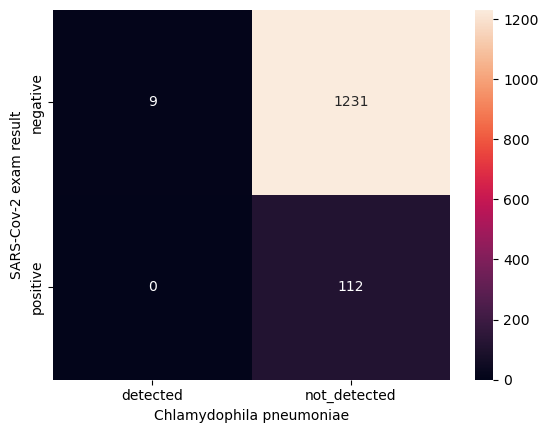

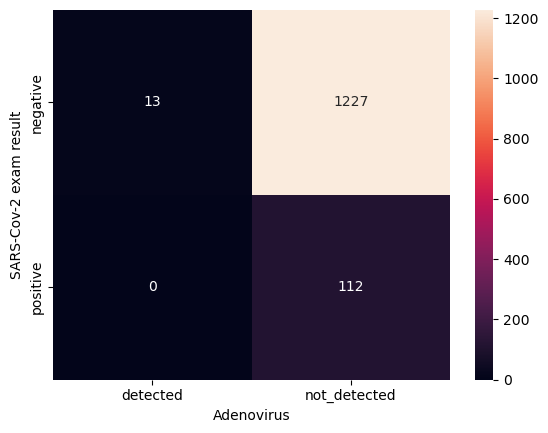

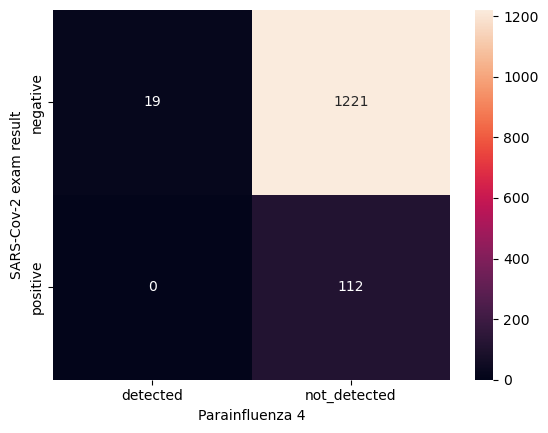

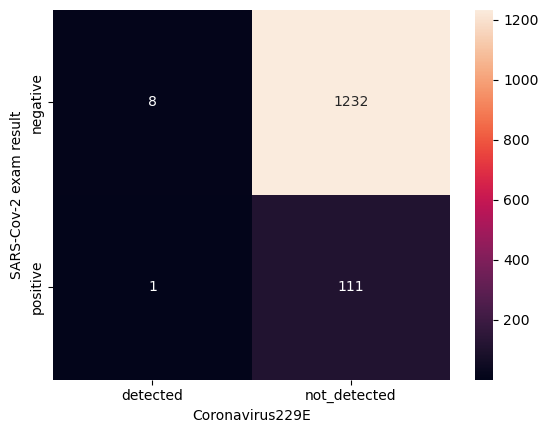

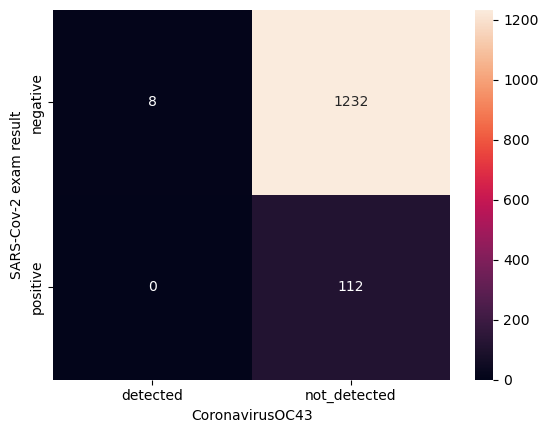

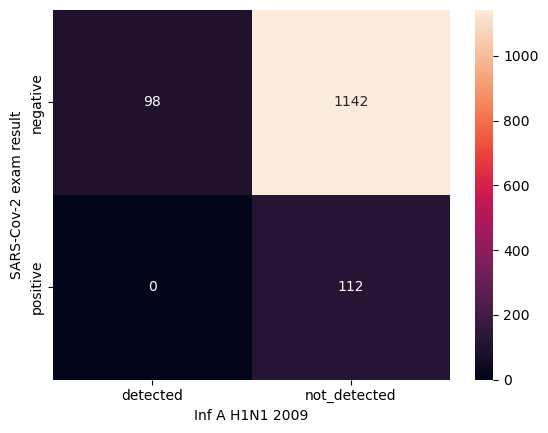

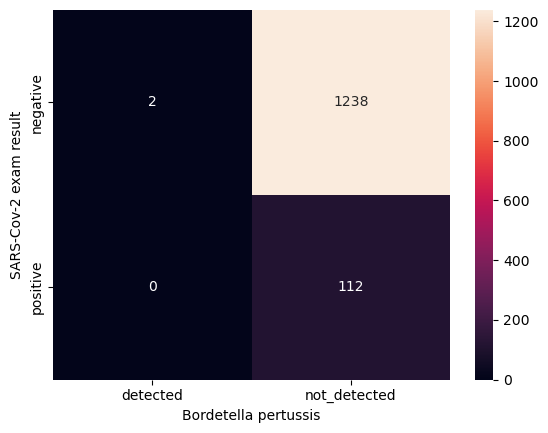

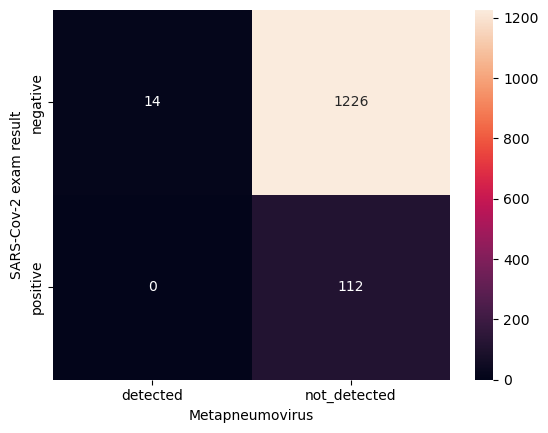

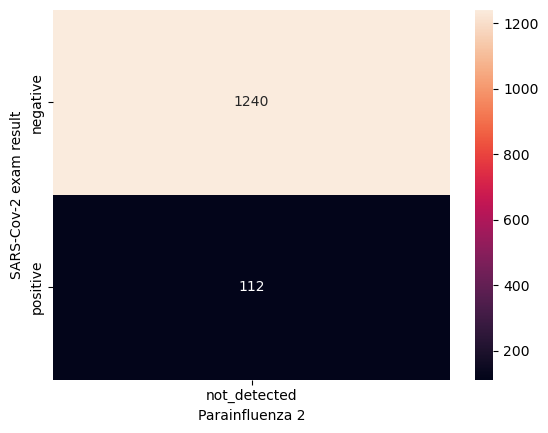

In [28]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot = True, fmt = 'd')

## Analyse avancée

### Relation Variables / Variables

#### Relations taux sanguin

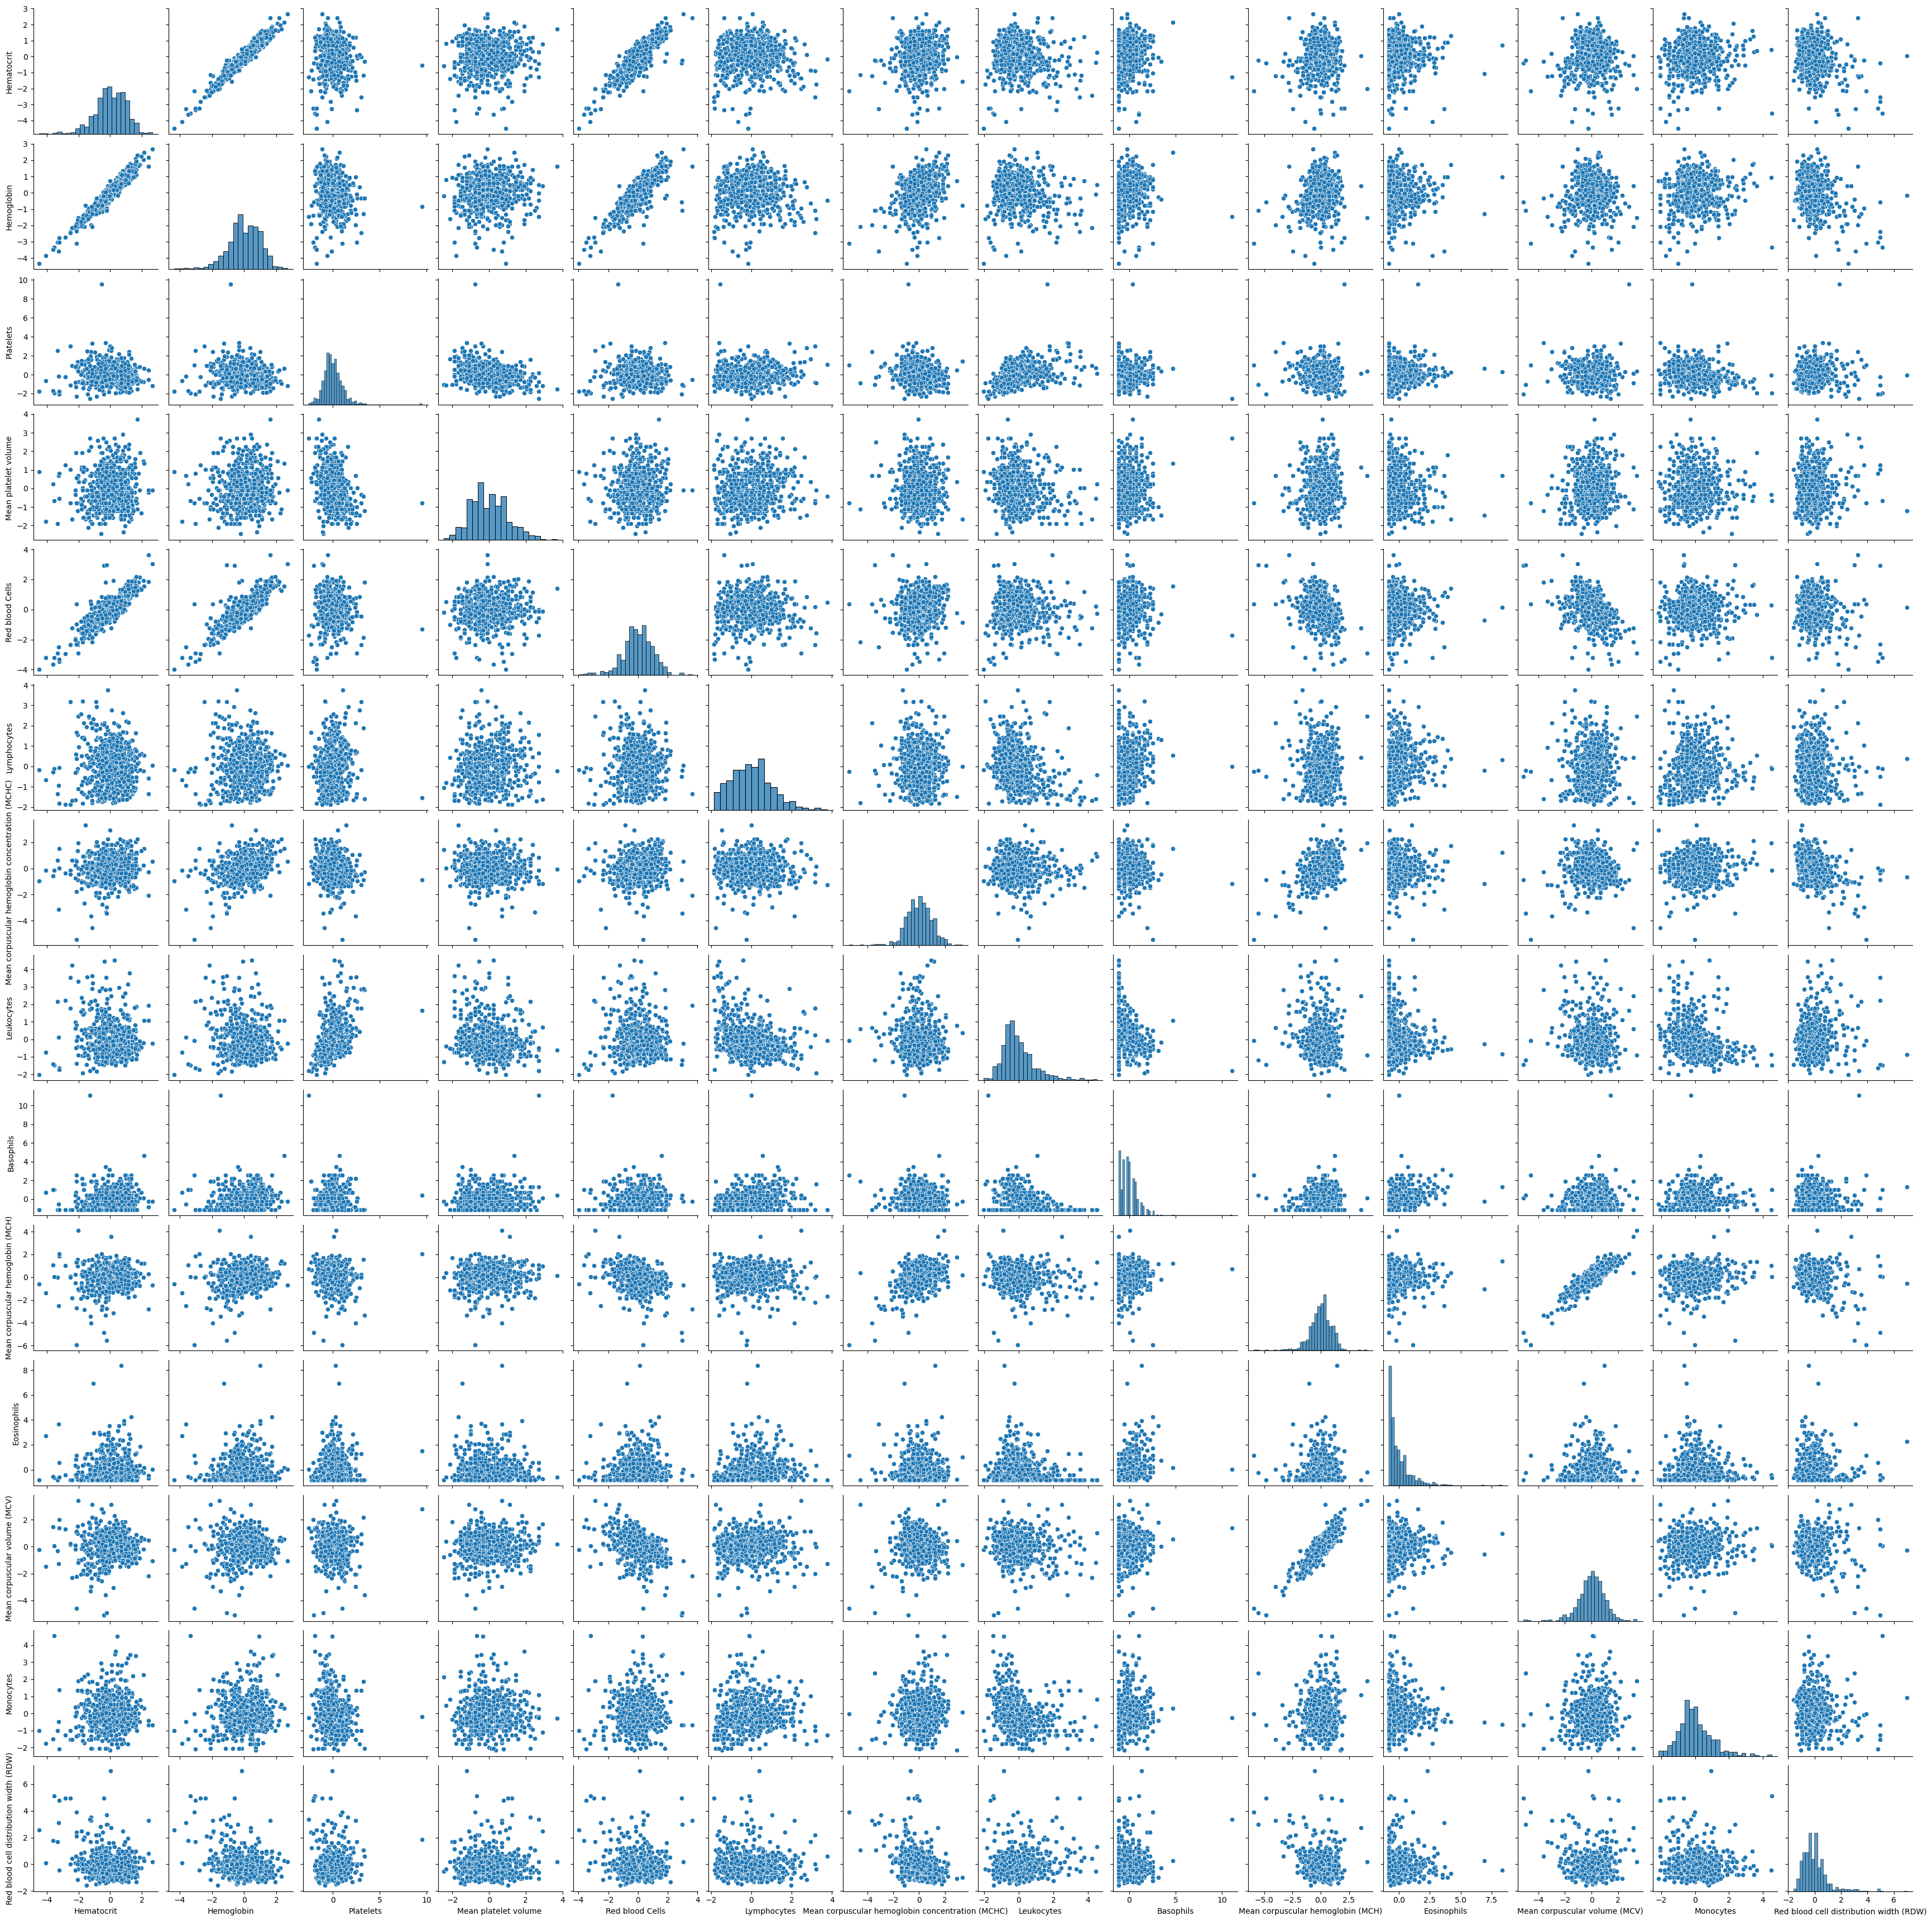

In [29]:
sns.pairplot(df[blood_columns])

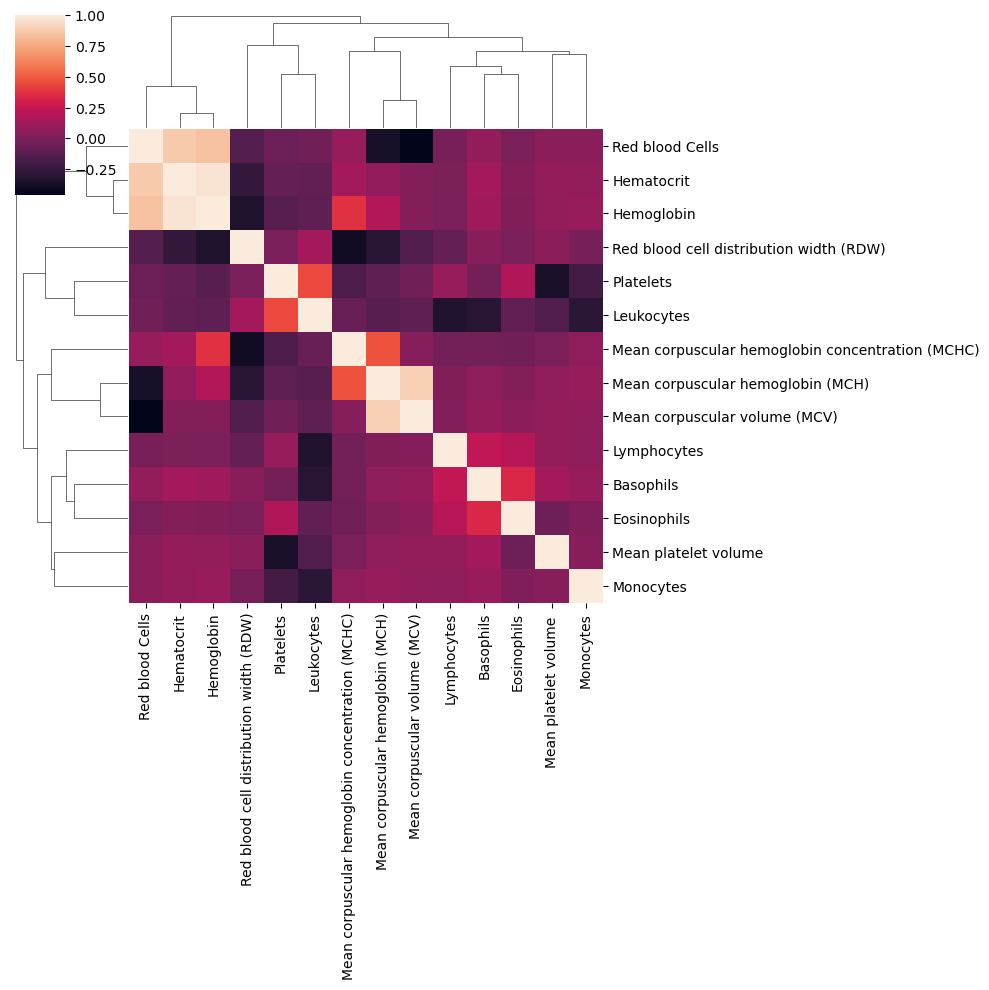

In [30]:
sns.clustermap(df[blood_columns].corr())

### Relation Age / Sang

C:\Users\PC\AppData\Local\Temp\ipykernel_9496\2545285869.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

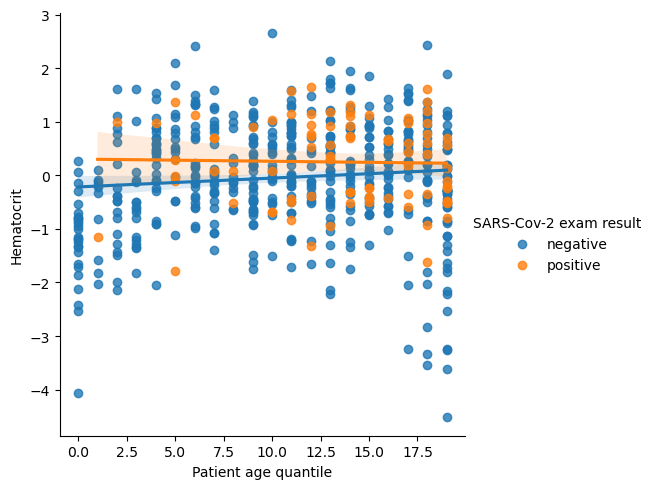

<Figure size 640x480 with 0 Axes>

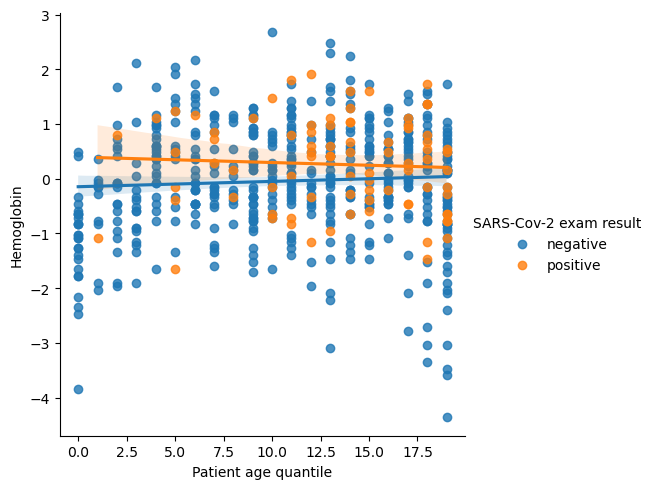

<Figure size 640x480 with 0 Axes>

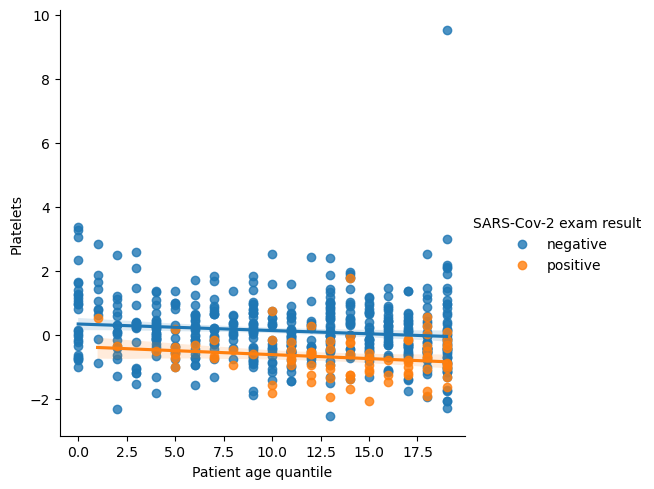

<Figure size 640x480 with 0 Axes>

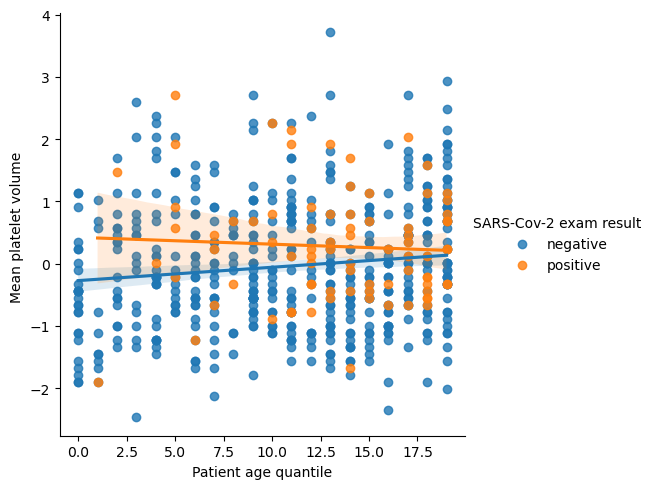

<Figure size 640x480 with 0 Axes>

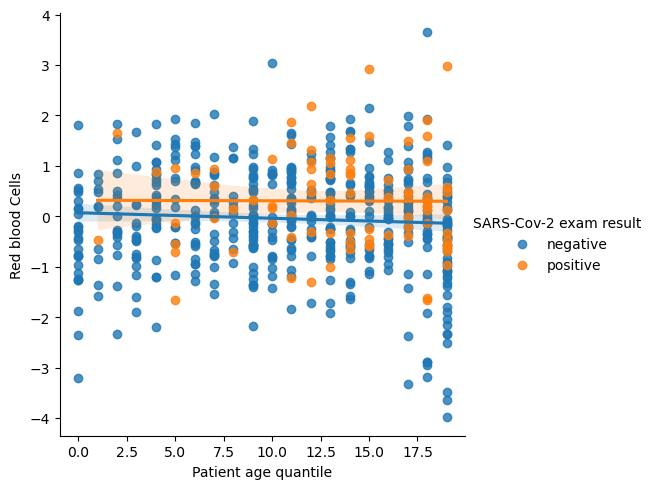

<Figure size 640x480 with 0 Axes>

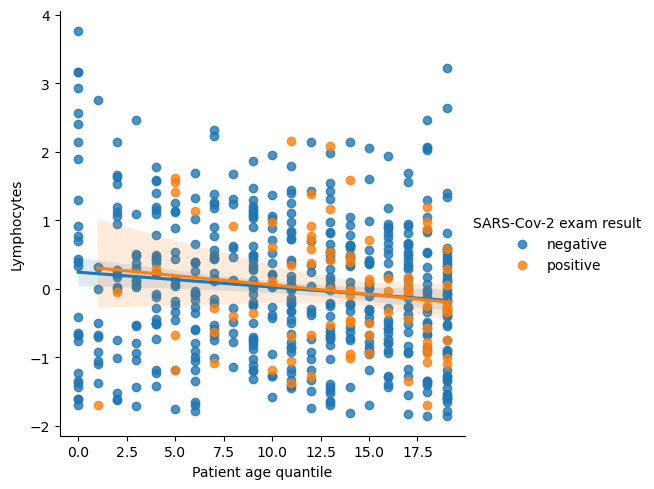

<Figure size 640x480 with 0 Axes>

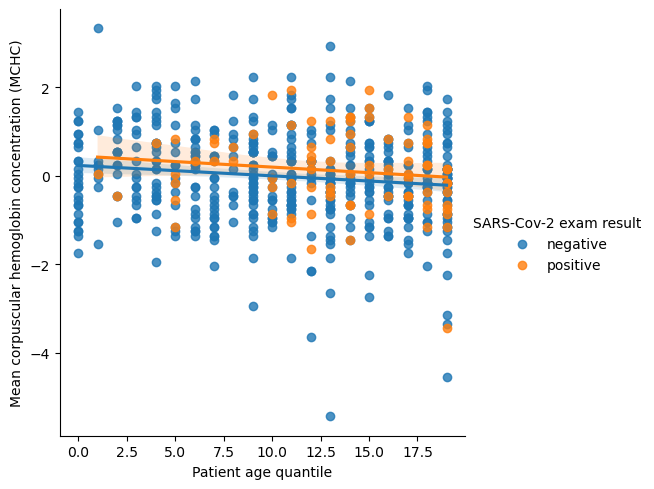

<Figure size 640x480 with 0 Axes>

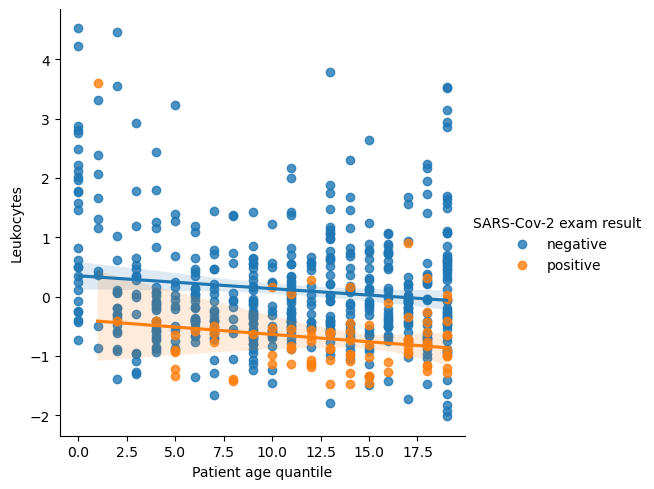

<Figure size 640x480 with 0 Axes>

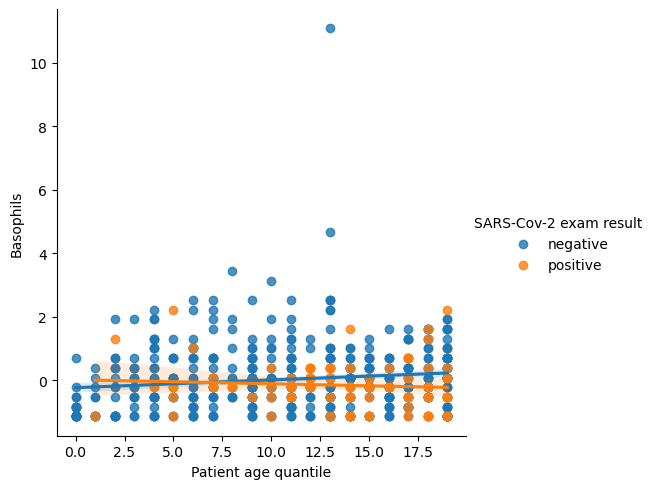

<Figure size 640x480 with 0 Axes>

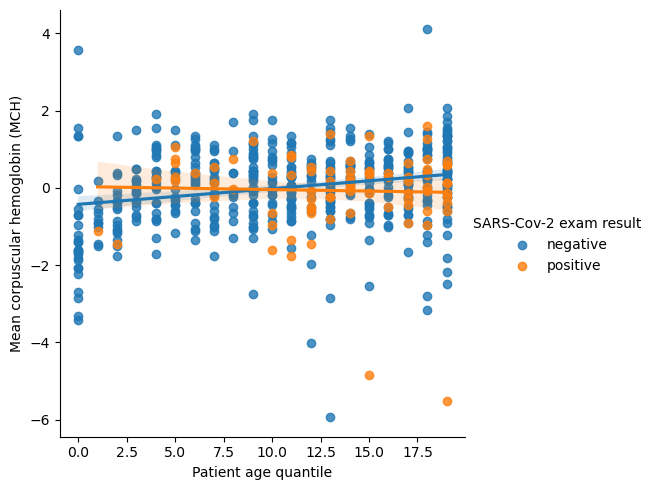

<Figure size 640x480 with 0 Axes>

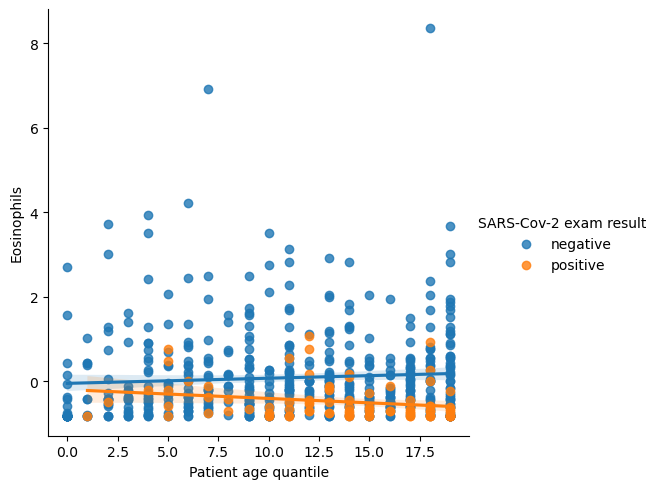

<Figure size 640x480 with 0 Axes>

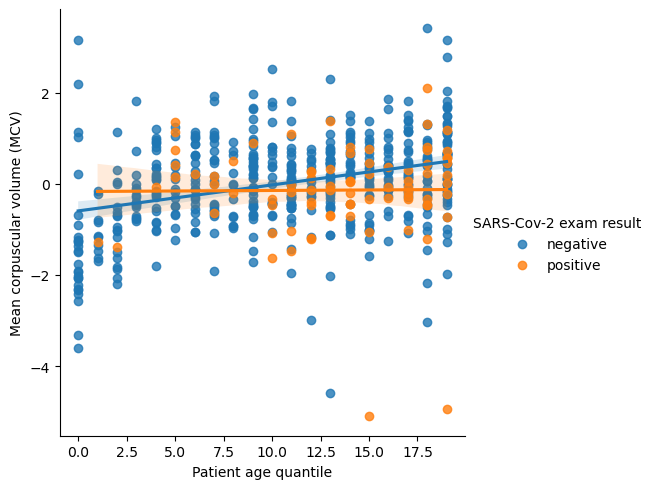

<Figure size 640x480 with 0 Axes>

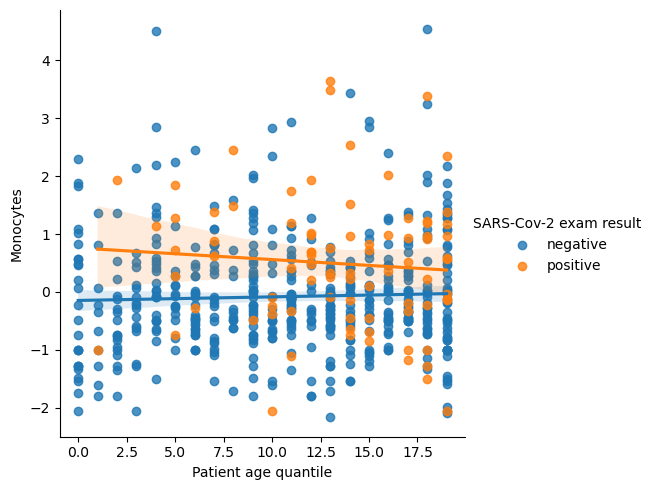

<Figure size 640x480 with 0 Axes>

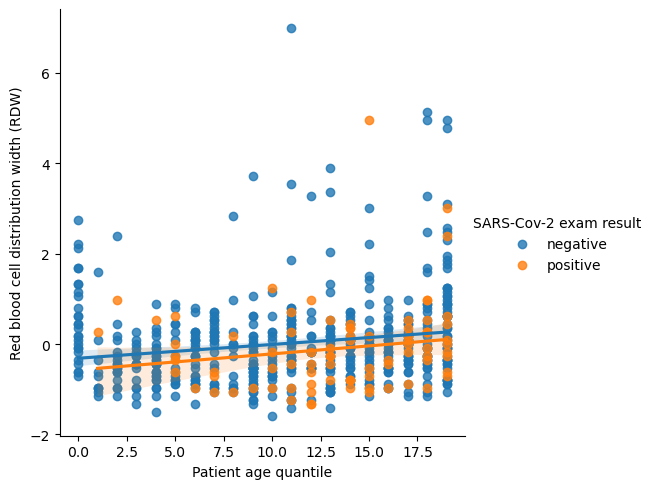

In [31]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y = col, hue = 'SARS-Cov-2 exam result', data = df)

In [32]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### Relation entre Influenza et rapid test

In [33]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [34]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### Relation Viral / sanguin

#### Création d'une nouvelle variable "Est malade" 

In [35]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis = 1) >=1 # :-2 élimine les deux dernières colonnes #Ajoute une nouvelle colonne "est malade"

In [36]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [37]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

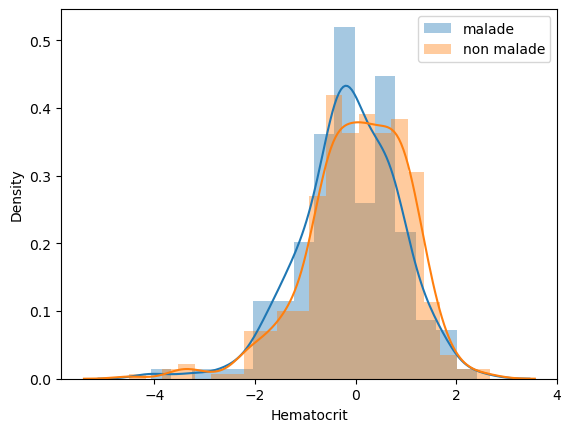

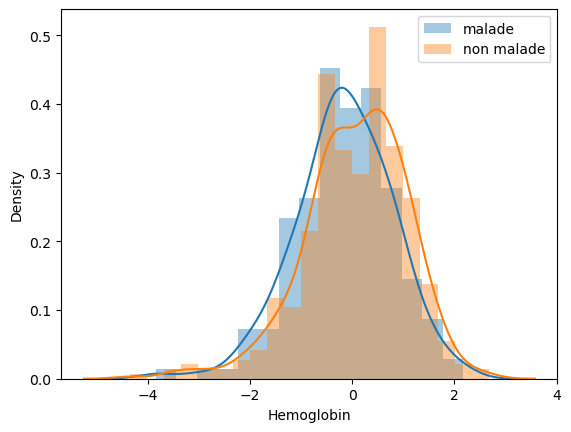

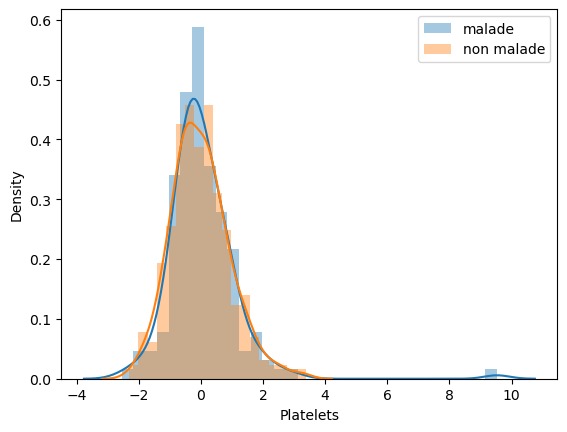

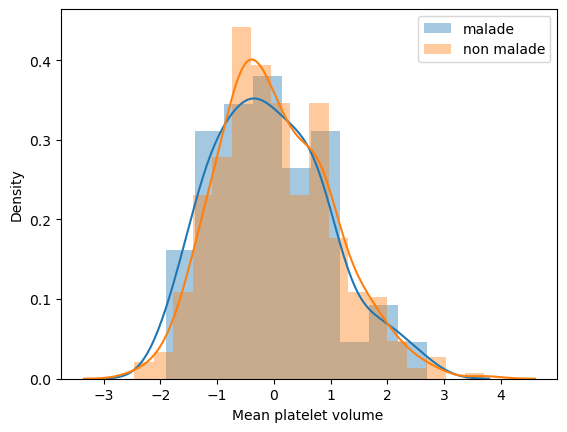

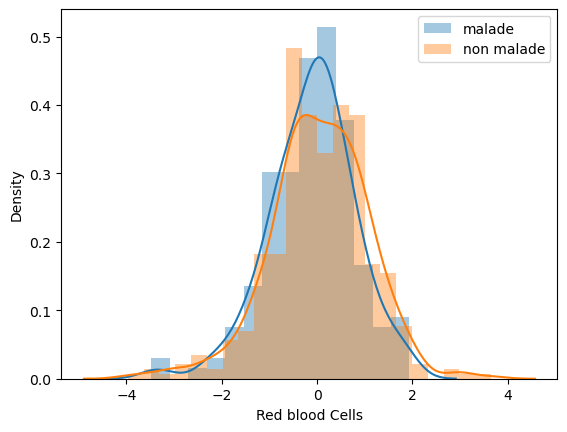

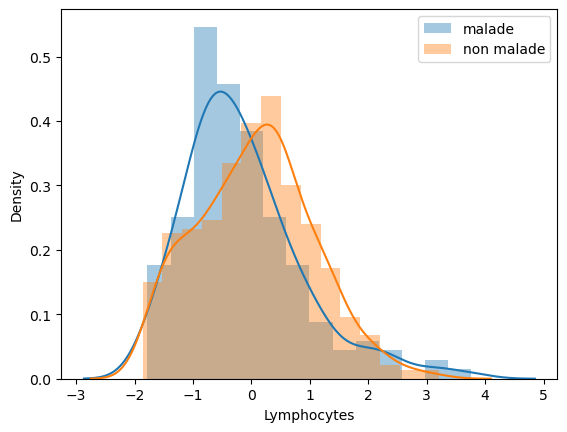

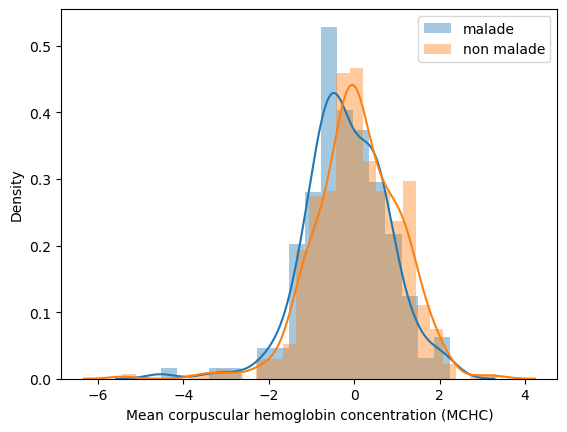

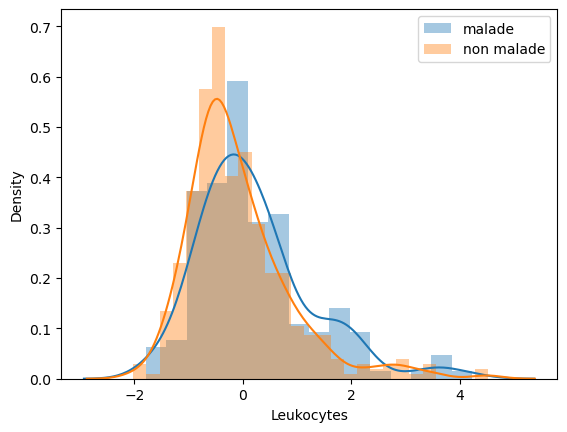

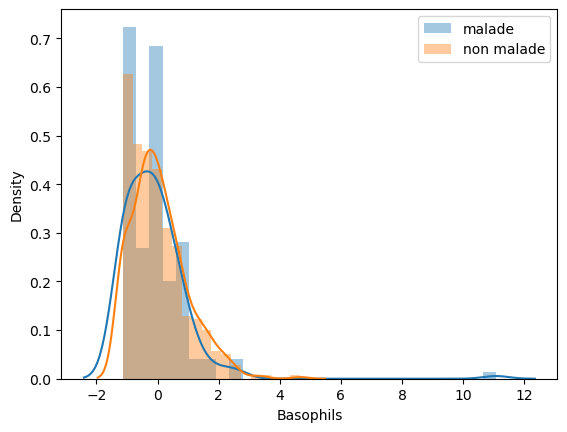

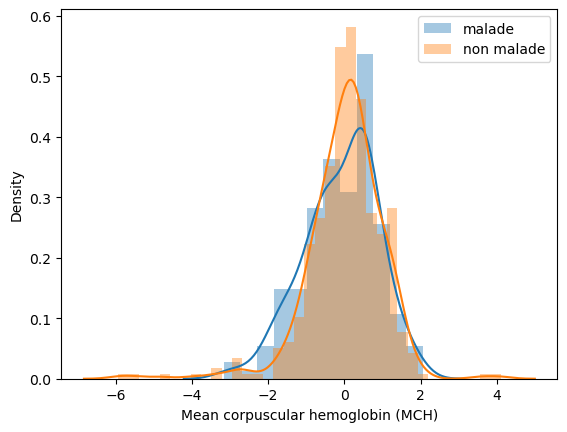

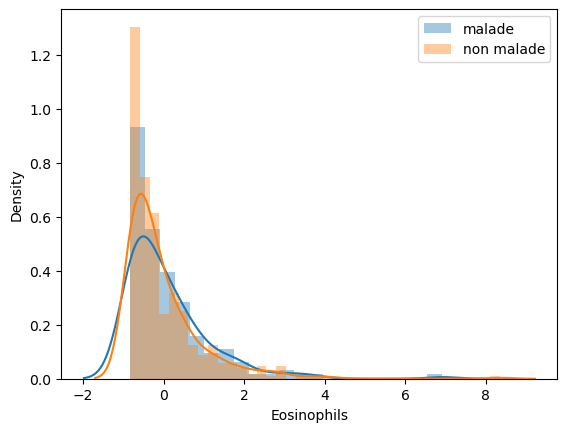

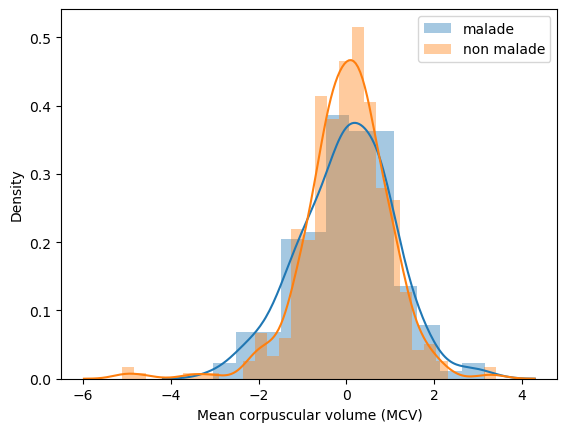

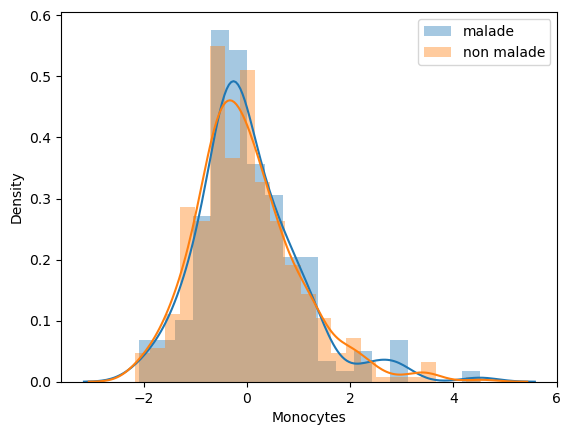

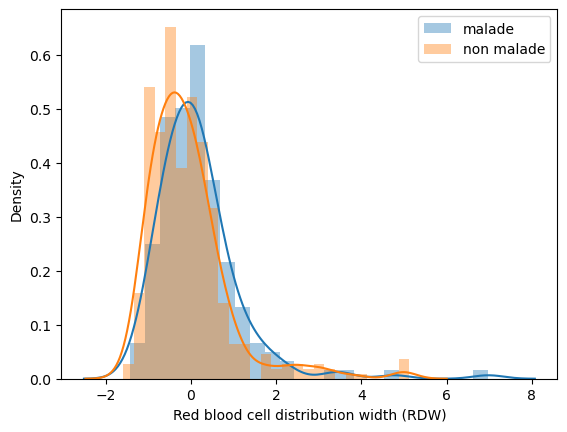

In [38]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label = 'malade')
    sns.distplot(non_malade_df[col], label = 'non malade')
    plt.legend()

In [39]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [40]:
df['statut'] = df.apply(hospitalisation, axis=1)
# Appliquer la fonction hospitalisation sur cet objet

In [41]:
df['statut'] = df.apply(hospitalisation, axis = 1)

In [42]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

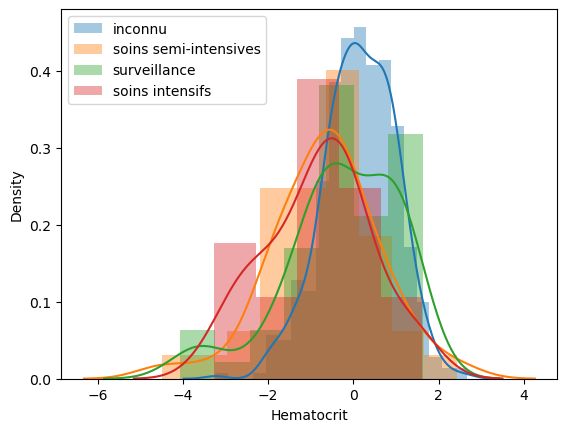

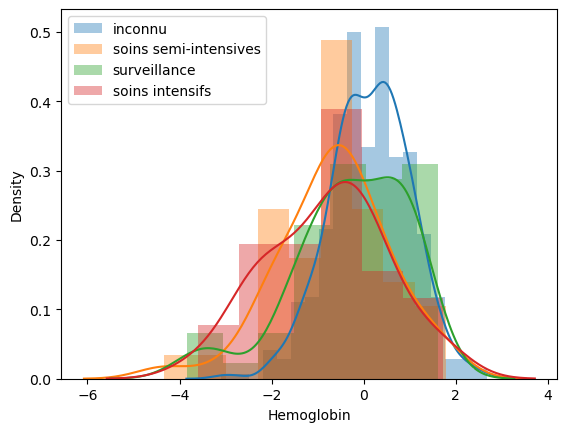

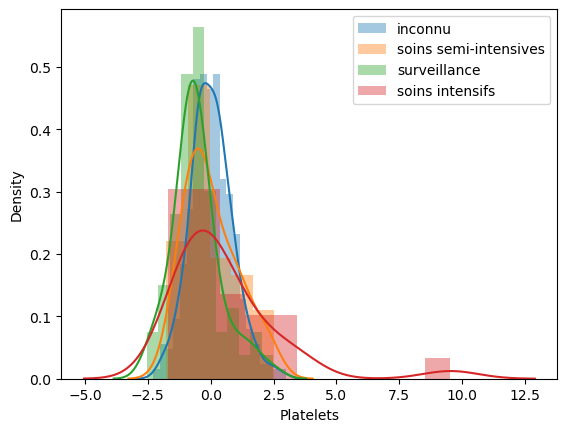

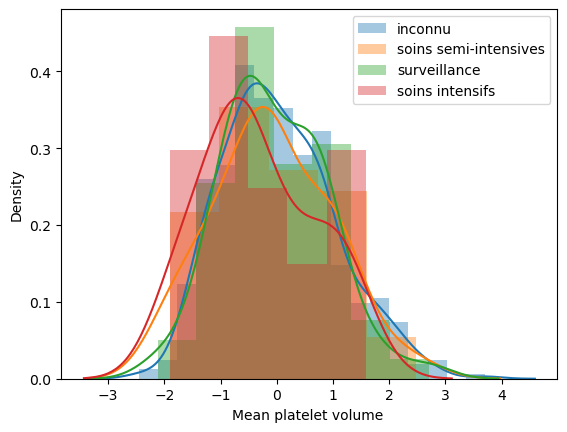

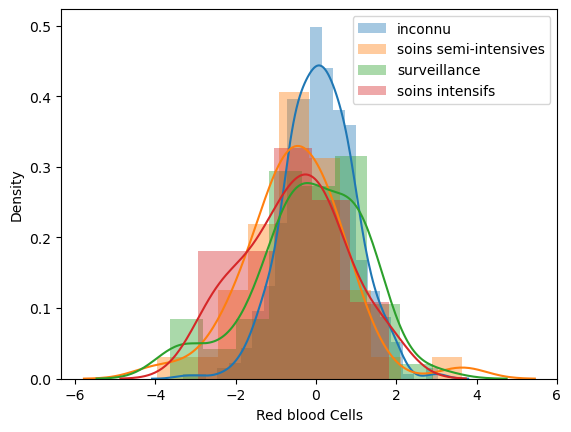

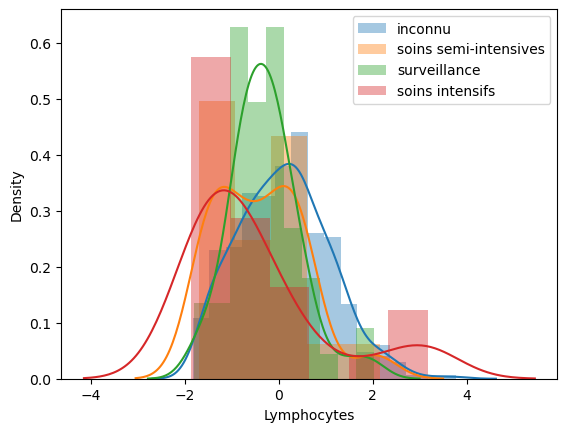

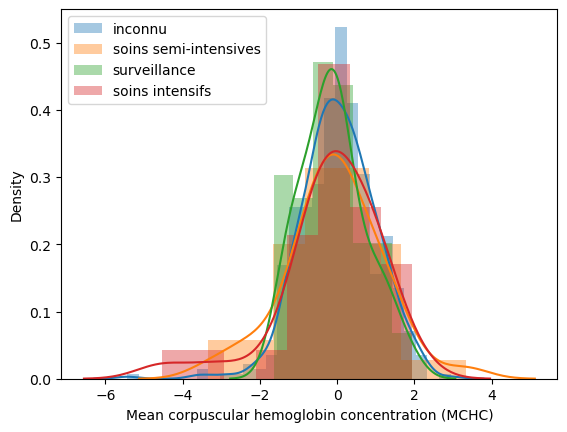

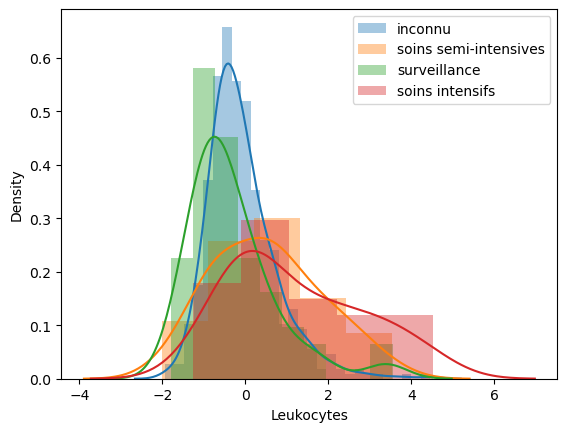

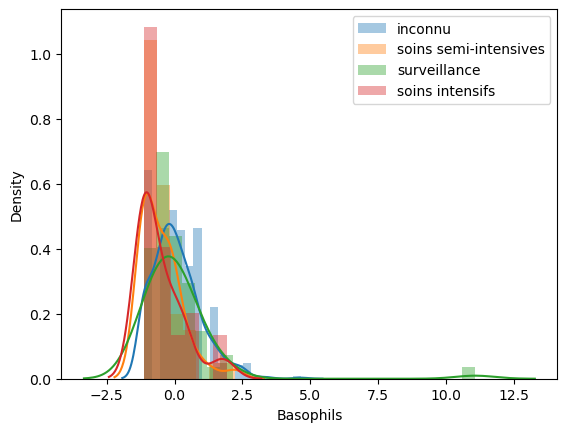

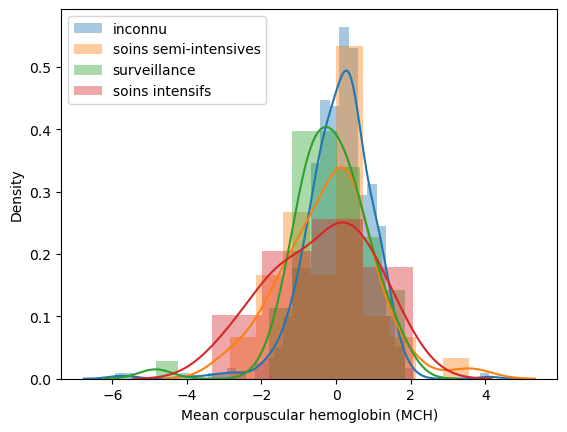

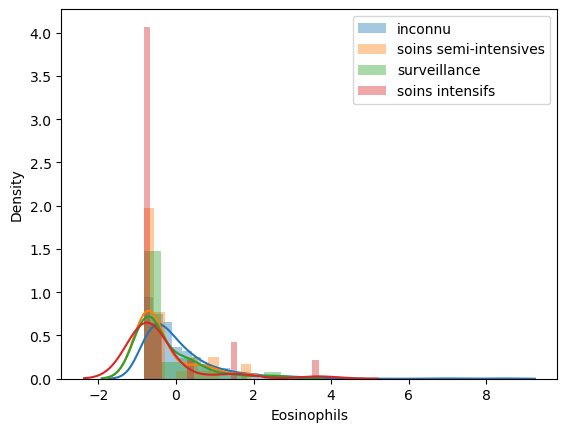

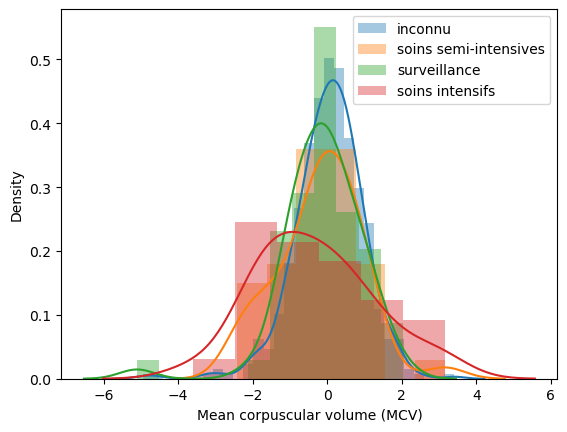

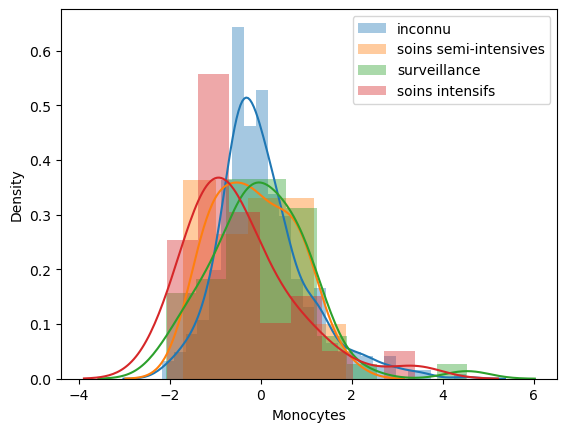

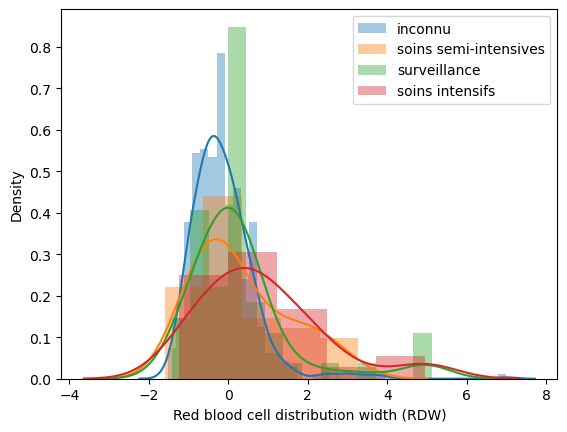

In [43]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label = cat)
    plt.legend()

In [44]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [45]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
dtype: int64

In [46]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9496\1681919767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [47]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9496\3321199378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

## T-Test

In [48]:
from scipy.stats import ttest_ind

In [49]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [50]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else:
        return 0

In [51]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- H0 Rejetée
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- H0 Rejetée
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0


# 2. Pre-processing

In [52]:
df = data.copy()

In [53]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

## Création des sous-ensembles (suite au EDA)

In [54]:
missing_rate = df.isna().sum()/df.shape[0]

In [55]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [56]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [57]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

## TrainTest - Nettoyage - Encodage

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
trainset, testset = train_test_split(df, test_size=0.2, random_state = 0)

In [60]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [61]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

### Encodage

In [69]:
def encodage(df):
    code = {'positive':1,
       'negative':0,
       'detected':1,
       'not_detected':0}
    for col in df.select_dtypes('object'):
        df.loc[:,col] = df[col].map(code)
    return df

In [70]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [71]:
def imputation(df):
    return df.dropna(axis=0)

In [87]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    print(y.value_counts())
    
    return X, y

In [88]:
X_train, y_train = preprocessing(trainset)

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64


In [89]:
X_test, y_test = preprocessing(testset)

0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


## Modélisation

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [91]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [92]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [93]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest


C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  warnings.warn("Features %s are constant." % con

[[51  3]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        54
           1       0.50      0.25      0.33        12

    accuracy                           0.82        66
   macro avg       0.68      0.60      0.61        66
weighted avg       0.79      0.82      0.79        66



C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 15  16  18  21  22  23  24  25  26  27  28  29  30  31  47  48  50  53
  54  55  56  57  58  59  60  61  62  63  78  79  81  84  85  86  87  88
  89  90  91  92  93  94 108 109 111 114 115 116 117 118 119 120 121 122
 123 124 137 138 140 143 144 145 146 147 148 149 150 151 152 153 165 166
 168 171 172 173 174 175 176 177 178 179 180 181 192 193 195 198 199 200
 201 202 203 204 205 206 207 208 218 219 221 224 225 226 227 228 229 230
 231 232 233 234 243 244 246 249 250 251 252 253 254 255 256 257 258 259
 267 268 270 273 274 275 276 277 278 279 280 281 282 283 290 291 293 296
 297 298 299 300 301 302 303 304 305 306 312 313 315 318 319 320 321 322
 323 324 325 326 327 328 333 334 336 339 340 341 342 343 344 345 346 347
 348 349 353 354 356 359 360 361 362 363 364 365 366 367 368 369 372 373
 375 378 379 380 381 382 383 384 385 386 387 388 390 391 393

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  48  50  55  56  57  61  63  81  86  92  94 111 116
 122 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234
 246 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341
 347 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411
 413 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432
 434 435 436 437 438 439 441 442 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  warnings.warn("Features %s are

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  24  27  29  31  47  50  55  56  57  59  61  63  81  86  87  90
  92  94 111 116 117 120 122 124 140 145 146 149 151 153 168 173 174 177
 179 181 195 200 201 204 206 208 221 226 227 230 232 234 246 251 252 255
 257 259 270 275 276 279 281 283 293 298 299 302 304 306 315 320 321 324
 326 328 336 341 342 345 347 349 356 361 362 365 367 369 375 380 381 384
 386 388 393 398 399 402 404 406 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435 437 438
 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458 459 460
 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478 479 480
 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498 499 500
 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 533 534 535

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  22  23  24  25  26  29  31  47  50  53  54  55  56  57  58  61
  63  81  84  85  86  87  88  89  92  94 111 114 115 116 117 118 119 122
 124 140 143 144 145 146 147 148 151 153 168 171 172 173 174 175 176 179
 181 195 198 199 200 201 202 203 206 208 221 224 225 226 227 228 229 232
 234 246 249 250 251 252 253 254 257 259 270 273 274 275 276 277 278 281
 283 293 296 297 298 299 300 301 304 306 315 318 319 320 321 322 323 326
 328 336 339 340 341 342 343 344 347 349 356 359 360 361 362 363 364 367
 369 375 378 379 380 381 382 383 386 388 393 396 397 398 399 400 401 404
 406 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425
 426 427 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463
 464 465 466 467 468 470 471 472 473 474 475 476 477 478 479

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  19  21  22  23  24  25  26  27  29  30  31  47  50  51  53  54  55
  56  57  58  59  61  62  63  81  82  84  85  86  87  88  89  90  92  93
  94 111 112 114 115 116 117 118 119 120 122 123 124 140 141 143 144 145
 146 147 148 149 151 152 153 168 169 171 172 173 174 175 176 177 179 180
 181 195 196 198 199 200 201 202 203 204 206 207 208 221 222 224 225 226
 227 228 229 230 232 233 234 246 247 249 250 251 252 253 254 255 257 258
 259 270 271 273 274 275 276 277 278 279 281 282 283 293 294 296 297 298
 299 300 301 302 304 305 306 315 316 318 319 320 321 322 323 324 326 327
 328 336 337 339 340 341 342 343 344 345 347 348 349 356 357 359 360 361
 362 363 364 365 367 368 369 375 376 378 379 380 381 382 383 384 386 387
 388 393 394 396 397 398 399 400 401 402 404 405 406 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 425 426 427 428

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  25  29  31  47  50  55  56  57  61  63  81  86  88  92  94 111
 116 118 122 124 140 145 147 151 153 168 173 175 179 181 195 200 202 206
 208 221 226 228 232 234 246 251 253 257 259 270 275 277 281 283 293 298
 300 304 306 315 320 322 326 328 336 341 343 347 349 356 361 363 367 369
 375 380 382 386 388 393 398 400 404 406 408 409 410 411 413 414 415 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437
 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475
 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497
 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 521 522 523 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553

AdaBoost
[[48  6]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        54
           1       0.40      0.33      0.36        12

    accuracy                           0.79        66
   macro avg       0.63      0.61      0.62        66
weighted avg       0.77      0.79      0.78        66



C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  warnings.warn("Features %s are constant." % con

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  48  50  55  56  57  61  63  81  86  92  94 111 116
 122 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234
 246 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341
 347 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411
 413 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432
 434 435 436 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452
 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471
 472 473 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492
 493 495 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531
 533 534 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553
 554 555 556 558 559] are constant.
  warnings.warn("Feature

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  24  29  31  47  50  55  56  57  61  63  81  86  87  92  94 111
 116 117 122 124 140 145 146 151 153 168 173 174 179 181 195 200 201 206
 208 221 226 227 232 234 246 251 252 257 259 270 275 276 281 283 293 298
 299 304 306 315 320 321 326 328 336 341 342 347 349 356 361 362 367 369
 375 380 381 386 388 393 398 399 404 406 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435
 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478
 479 480 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 533 534 535 536
 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  23  25  29  31  47  50  53  55  56  57  61  63  81  84  86  88
  92  94 111 114 116 118 122 124 140 143 145 147 151 153 168 171 173 175
 179 181 195 198 200 202 206 208 221 224 226 228 232 234 246 249 251 253
 257 259 270 273 275 277 281 283 293 296 298 300 304 306 315 318 320 322
 326 328 336 339 341 343 347 349 356 359 361 363 367 369 375 378 380 382
 386 388 393 396 398 400 404 406 408 409 410 411 413 414 415 417 418 419
 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437 438 439
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 529 530 531 532 533

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  warnings.warn("Features %s are

SVM
[[51  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66



C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  warnings.warn("Features %s are constant." % con

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 436 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456
 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476
 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537
 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  warnings.warn("Features %s are constant." %

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  24  27  29  31  47  50  55  56  57  59  61  63  81  86  87  90
  92  94 111 116 117 120 122 124 140 145 146 149 151 153 168 173 174 177
 179 181 195 200 201 204 206 208 221 226 227 230 232 234 246 251 252 255
 257 259 270 275 276 279 281 283 293 298 299 302 304 306 315 320 321 324
 326 328 336 341 342 345 347 349 356 361 362 365 367 369 375 380 381 384
 386 388 393 398 399 402 404 406 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435 437 438
 439 441 442 444 445 446 447 448 449 450 452 453 454 455 456 457 458 459
 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478 479
 480 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 524 525 526 527 528 529 530 531 533 534

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  23  25  29  31  47  50  53  55  56  57  61  63  81  84  86  88
  92  94 111 114 116 118 122 124 140 143 145 147 151 153 168 171 173 175
 179 181 195 198 200 202 206 208 221 224 226 228 232 234 246 249 251 253
 257 259 270 273 275 277 281 283 293 296 298 300 304 306 315 318 320 322
 326 328 336 339 341 343 347 349 356 359 361 363 367 369 375 378 380 382
 386 388 393 396 398 400 404 406 408 409 410 411 413 414 415 417 418 419
 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437 438 439
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 529 530 531 532 533

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462

KNN
[[49  5]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.50      0.42      0.45        12

    accuracy                           0.82        66
   macro avg       0.69      0.66      0.67        66
weighted avg       0.81      0.82      0.81        66



C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  warnings.warn("Features %s are constant." % con

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  48  50  55  56  57  61  63  81  86  92  94 111 116
 122 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234
 246 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341
 347 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411
 413 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432
 434 435 436 437 438 439 441 442 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  warnings.warn("Features %s are

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  24  27  29  31  47  50  55  56  57  59  61  63  81  86  87  90
  92  94 111 116 117 120 122 124 140 145 146 149 151 153 168 173 174 177
 179 181 195 200 201 204 206 208 221 226 227 230 232 234 246 251 252 255
 257 259 270 275 276 279 281 283 293 298 299 302 304 306 315 320 321 324
 326 328 336 341 342 345 347 349 356 361 362 365 367 369 375 380 381 384
 386 388 393 398 399 402 404 406 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435 437 438
 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458 459 460
 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478 479 480
 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498 499 500
 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 533 534 535

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  21  23  25  29  31  47  50  53  55  56  57  61  63  81  84  86  88
  92  94 111 114 116 118 122 124 140 143 145 147 151 153 168 171 173 175
 179 181 195 198 200 202 206 208 221 224 226 228 232 234 246 249 251 253
 257 259 270 273 275 277 281 283 293 296 298 300 304 306 315 318 320 322
 326 328 336 339 341 343 347 349 356 359 361 363 367 369 375 378 380 382
 386 388 393 396 398 400 404 406 408 409 410 411 413 414 415 417 418 419
 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437 438 439
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 529 530 531 532 533

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  19  21  22  23  24  25  26  27  29  30  31  47  50  51  53  54  55
  56  57  58  59  61  62  63  81  82  84  85  86  87  88  89  90  92  93
  94 111 112 114 115 116 117 118 119 120 122 123 124 140 141 143 144 145
 146 147 148 149 151 152 153 168 169 171 172 173 174 175 176 177 179 180
 181 195 196 198 199 200 201 202 203 204 206 207 208 221 222 224 225 226
 227 228 229 230 232 233 234 246 247 249 250 251 252 253 254 255 257 258
 259 270 271 273 274 275 276 277 278 279 281 282 283 293 294 296 297 298
 299 300 301 302 304 305 306 315 316 318 319 320 321 322 323 324 326 327
 328 336 337 339 340 341 342 343 344 345 347 348 349 356 357 359 360 361
 362 363 364 365 367 368 369 375 376 378 379 380 381 382 383 384 386 387
 388 393 394 396 397 398 399 400 401 402 404 405 406 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 425 426 427 428

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  warnings.warn("Features %s are

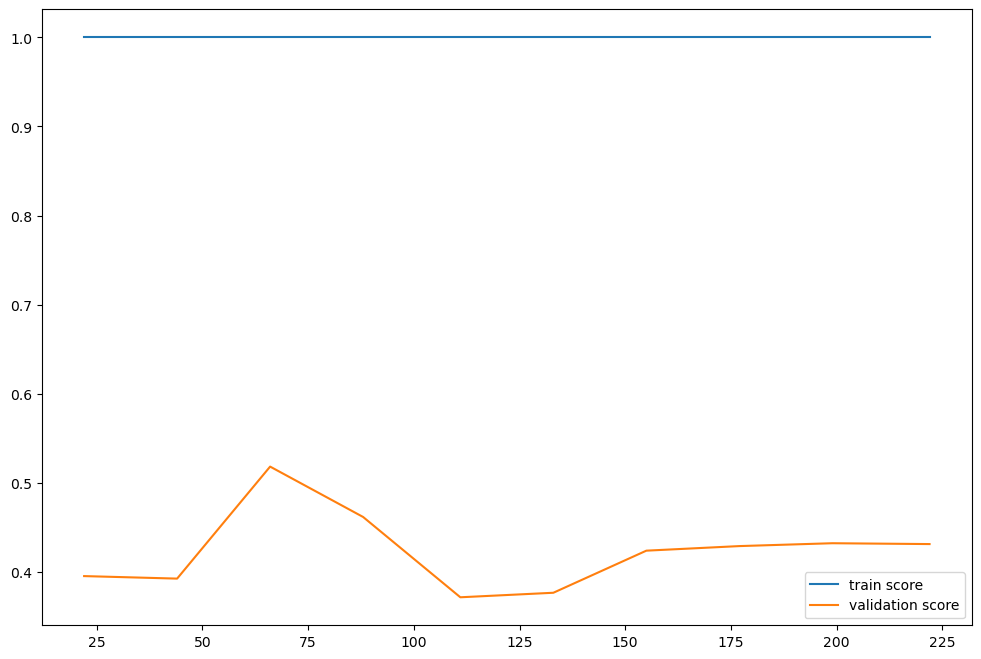

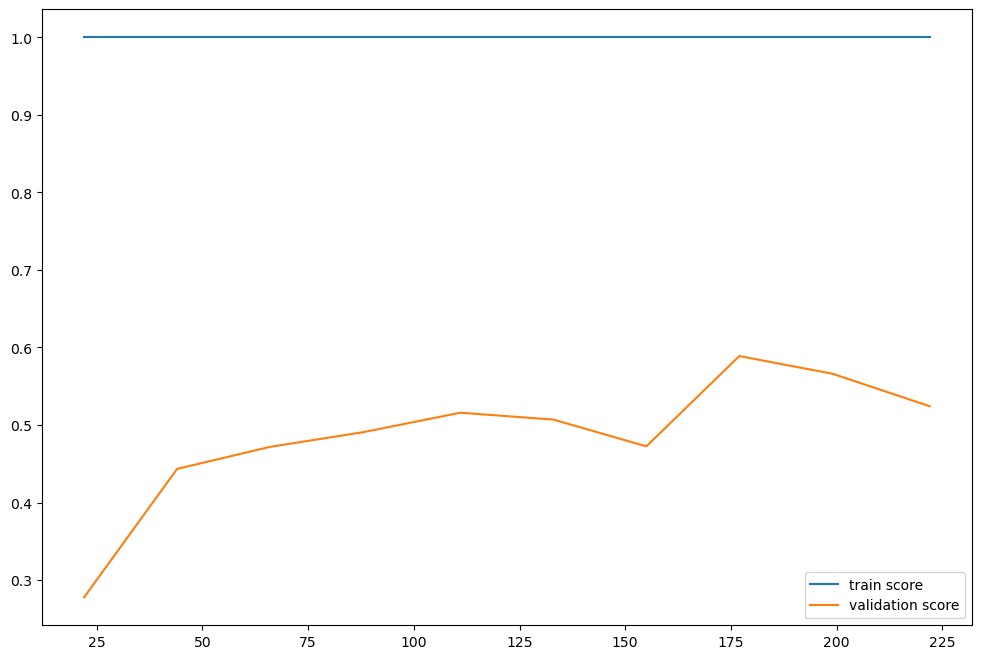

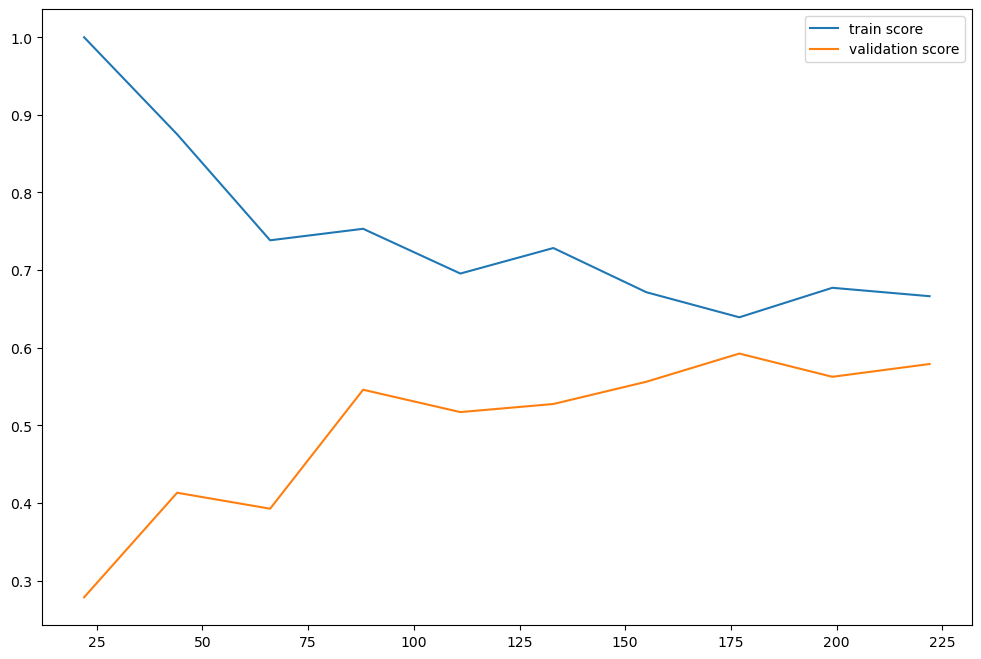

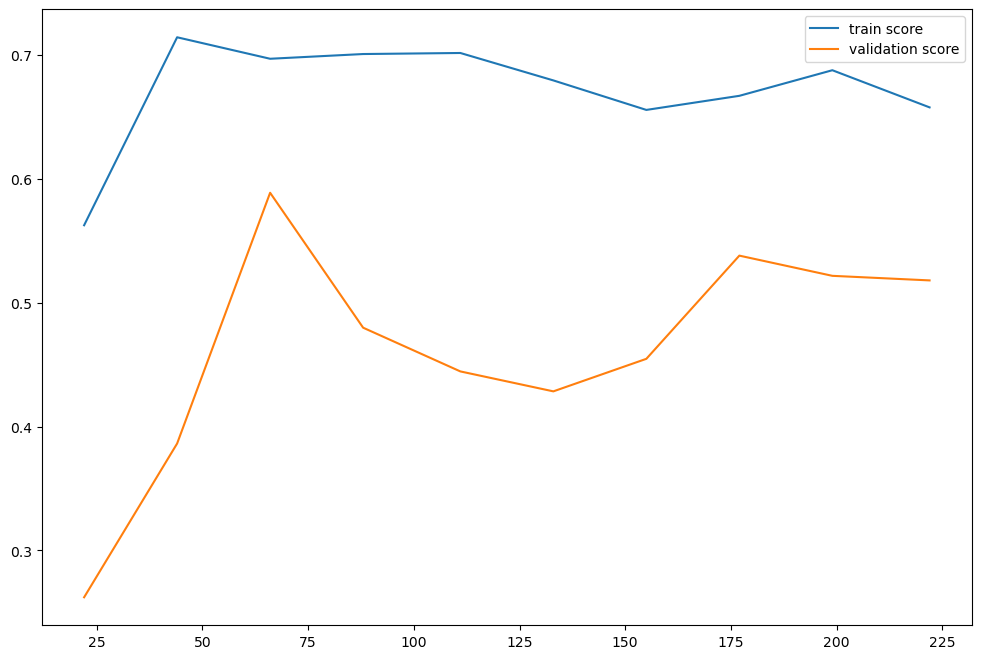

In [104]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## Procédure d'évaluation

In [95]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [96]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[54  0]
 [11  1]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        54
           1       1.00      0.08      0.15        12

    accuracy                           0.83        66
   macro avg       0.92      0.54      0.53        66
weighted avg       0.86      0.83      0.77        66



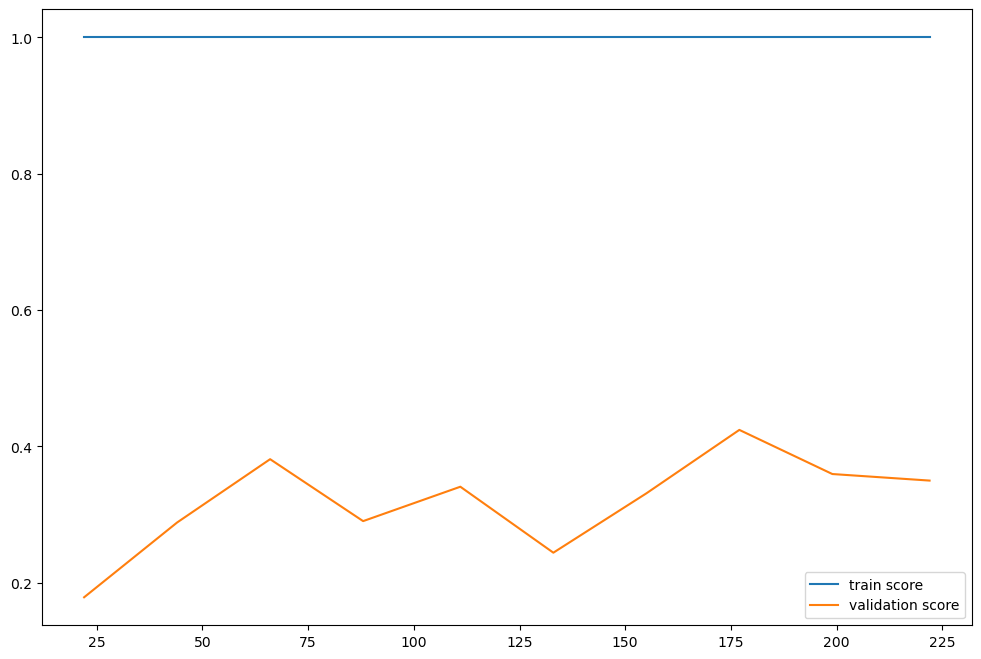

In [97]:
evaluation(model_1)

<AxesSubplot:>

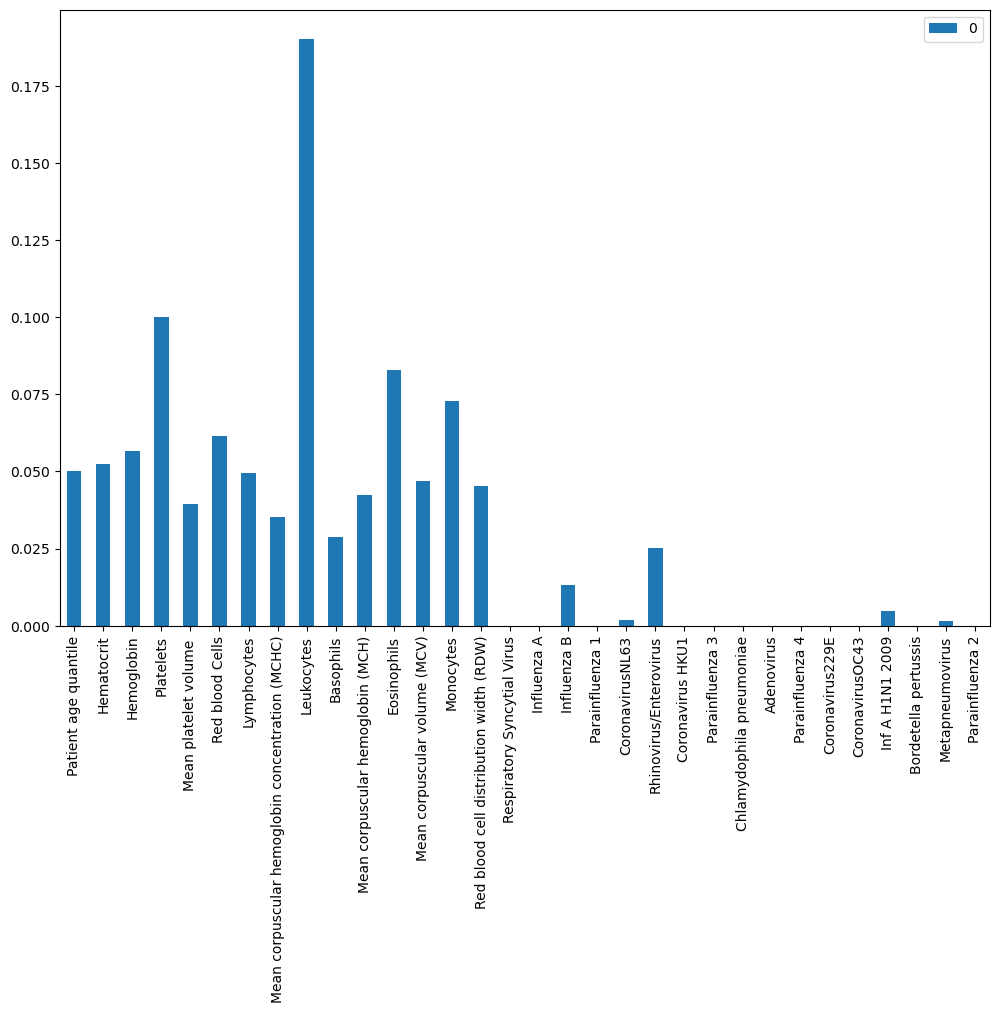

In [99]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

## OPTIMISATION 

In [100]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [101]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [102]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [103]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 436 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456
 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476
 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537
 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  warnings.warn("Features %s are constant." %

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 436 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456
 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476
 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537
 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  warnings.warn("Features %s are constant." %

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  25  29  31  47  50  55  56  57  61  63  81  86  88  92  94 111
 116 118 122 124 140 145 147 151 153 168 173 175 179 181 195 200 202 206
 208 221 226 228 232 234 246 251 253 257 259 270 275 277 281 283 293 298
 300 304 306 315 320 322 326 328 336 341 343 347 349 356 361 363 367 369
 375 380 382 386 388 393 398 400 404 406 408 409 410 411 413 414 415 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437
 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458 459
 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478 479
 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499 500 501
 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520
 521 522 523 525 526 527 528 529 530 531 532 533 534 535 536 537 538 540
 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  25  29  31  47  50  55  56  57  61  63  81  86  88  92  94 111
 116 118 122 124 140 145 147 151 153 168 173 175 179 181 195 200 202 206
 208 221 226 228 232 234 246 251 253 257 259 270 275 277 281 283 293 298
 300 304 306 315 320 322 326 328 336 341 343 347 349 356 361 363 367 369
 375 380 382 386 388 393 398 400 404 406 408 409 410 411 413 414 415 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437
 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458 459
 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478 479
 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499 500 501
 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520
 521 522 523 525 526 527 528 529 530 531 532 533 534 535 536 537 538 540
 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  24  29  31  47  50  55  56  57  61  63  81  86  87  92  94 111
 116 117 122 124 140 145 146 151 153 168 173 174 179 181 195 200 201 206
 208 221 226 227 232 234 246 251 252 257 259 270 275 276 281 283 293 298
 299 304 306 315 320 321 326 328 336 341 342 347 349 356 361 362 367 369
 375 380 381 386 388 393 398 399 404 406 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435
 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478
 479 480 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 533 534 535 536
 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 436 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456
 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476
 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537
 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  warnings.warn("Features %s are constant." %

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  24  29  31  47  50  55  56  57  61  63  81  86  87  92  94 111
 116 117 122 124 140 145 146 151 153 168 173 174 179 181 195 200 201 206
 208 221 226 227 232 234 246 251 252 257 259 270 275 276 281 283 293 298
 299 304 306 315 320 321 326 328 336 341 342 347 349 356 361 362 367 369
 375 380 381 386 388 393 398 399 404 406 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435
 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478
 479 480 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 533 534 535 536
 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   24 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   25 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   29 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   24 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   24 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   25 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   29 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   24 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  24  29  31  47  50  55  56  57  61  63  81  86  87  92  94 111
 116 117 122 124 140 145 146 151 153 168 173 174 179 181 195 200 201 206
 208 221 226 227 232 234 246 251 252 257 259 270 275 276 281 283 293 298
 299 304 306 315 320 321 326 328 336 341 342 347 349 356 361 362 367 369
 375 380 381 386 388 393 398 399 404 406 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435
 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478
 479 480 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 533 534 535 536
 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554

C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   24 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   25 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_

{'svc__gamma': 0.0001, 'svc__C': 1000, 'pipeline__selectkbest__k': 51, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        54
           1       0.83      0.42      0.56        12

    accuracy                           0.88        66
   macro avg       0.86      0.70      0.74        66
weighted avg       0.87      0.88      0.86        66



C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  18   23   29 ... 6541 6542 6543] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 436 437 438 439 441 442 444 445 446 